### STEP 1: IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import warnings

warnings.filterwarnings('ignore')

### OverviewCervical cancer is a type of cancer that occurs in the cells of the cervix, which is the lower part of the uterus that connects to the vagina. It is usually caused by the human papillomavirus (HPV), a sexually transmitted infection. Cervical cancer typically develops slowly over time and may not cause symptoms until it has advanced.

Some common symptoms of cervical cancer include abnormal vaginal bleeding, pelvic pain, pain during sexual intercourse, and unusual vaginal discharge.
According to the World Health Organization (WHO), cervical cancer is the fourth most common cancer among women globally, with an estimated 604,000 new cases and 342,000 deaths in 2020. Around 90% of cervical cancer deaths occur in low- and middle-income countries, where screening and treatment are less accessible.

The highest rates of cervical cancer incidence and mortality are observed in regions such as sub-Saharan Africa, Central America, and South-East Asia.

Cervical cancer is largely preventable through vaccination against HPV and regular screening with Pap smears or HPV tests, which can detect abnormal cells before they become cancerous. Early detection and treatment significantly increase the chances of successful outcomes for women diagnosed with cervical cancer.
ction.

In [2]:
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### STEP 2: PRE PROCESSING & EDA

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# REPLACING '?' WITH NaN

cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


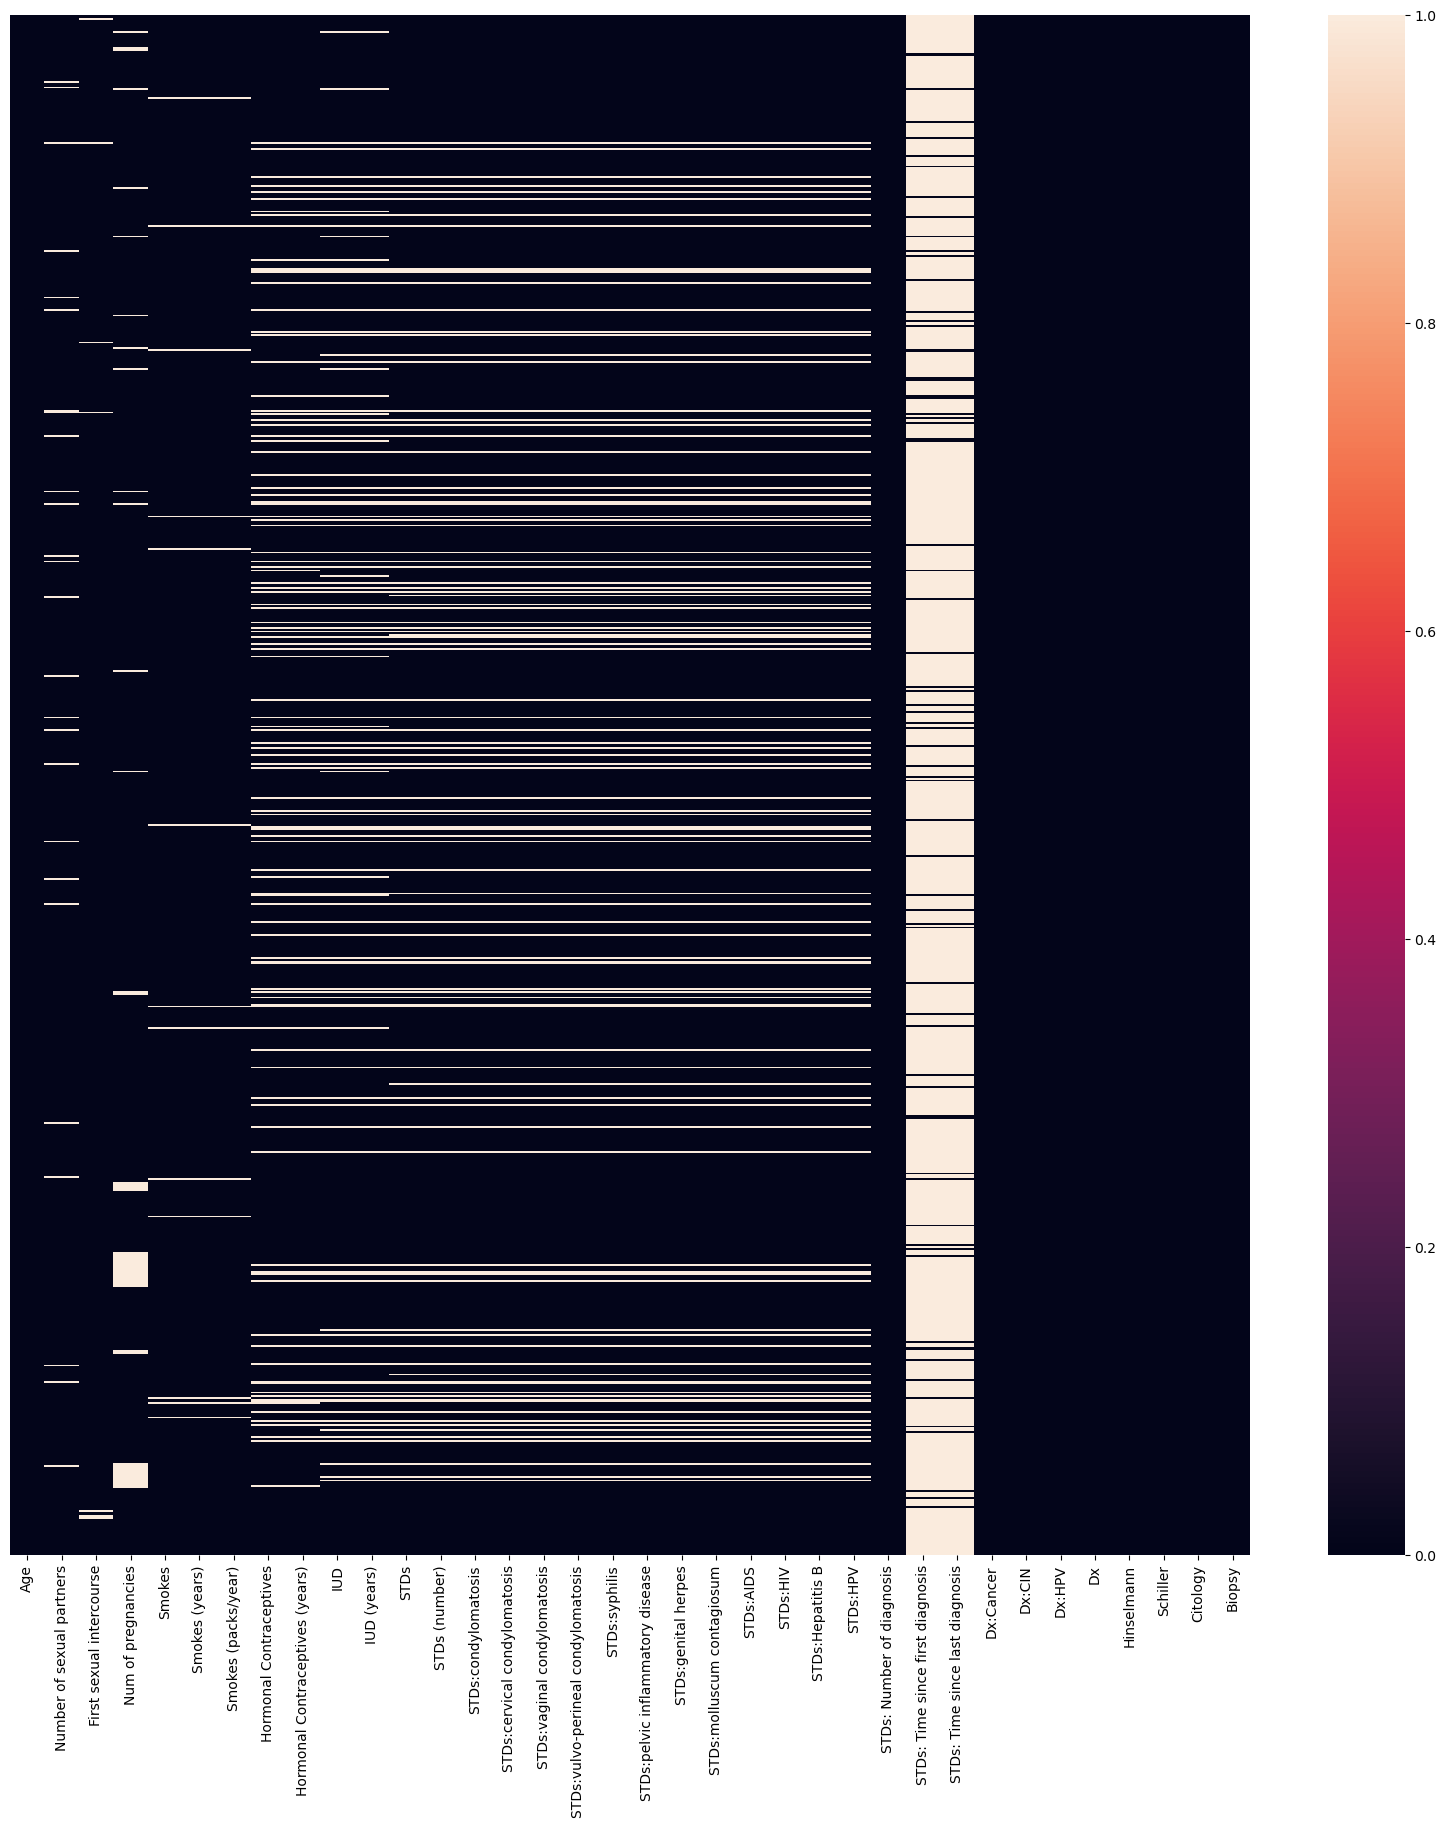

In [7]:
# PLOTTING HEATMAP TO VISUALIZE THE NUMBER OF NaN'S IN TH DATA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False)
plt.show()

In [8]:
# WE OBSERVE THAT THERE ARE A LOT OF NAN VALUES IN "STD'S: TIME SINCE FIRST DIAGNOSIS" AND "STD'S: TIME SINCE LAST DIAGNOSIS" 
# SO WE WILL DROP THESE COLUMNS

cancer_df = cancer_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [9]:
# Converting the column data types, from object to numeric in order to perform Statistical Analysis of the Data

cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [10]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
cancer_df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [12]:
# REPLACING NULL/NaN values with the mean values:

cancer_df =  cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


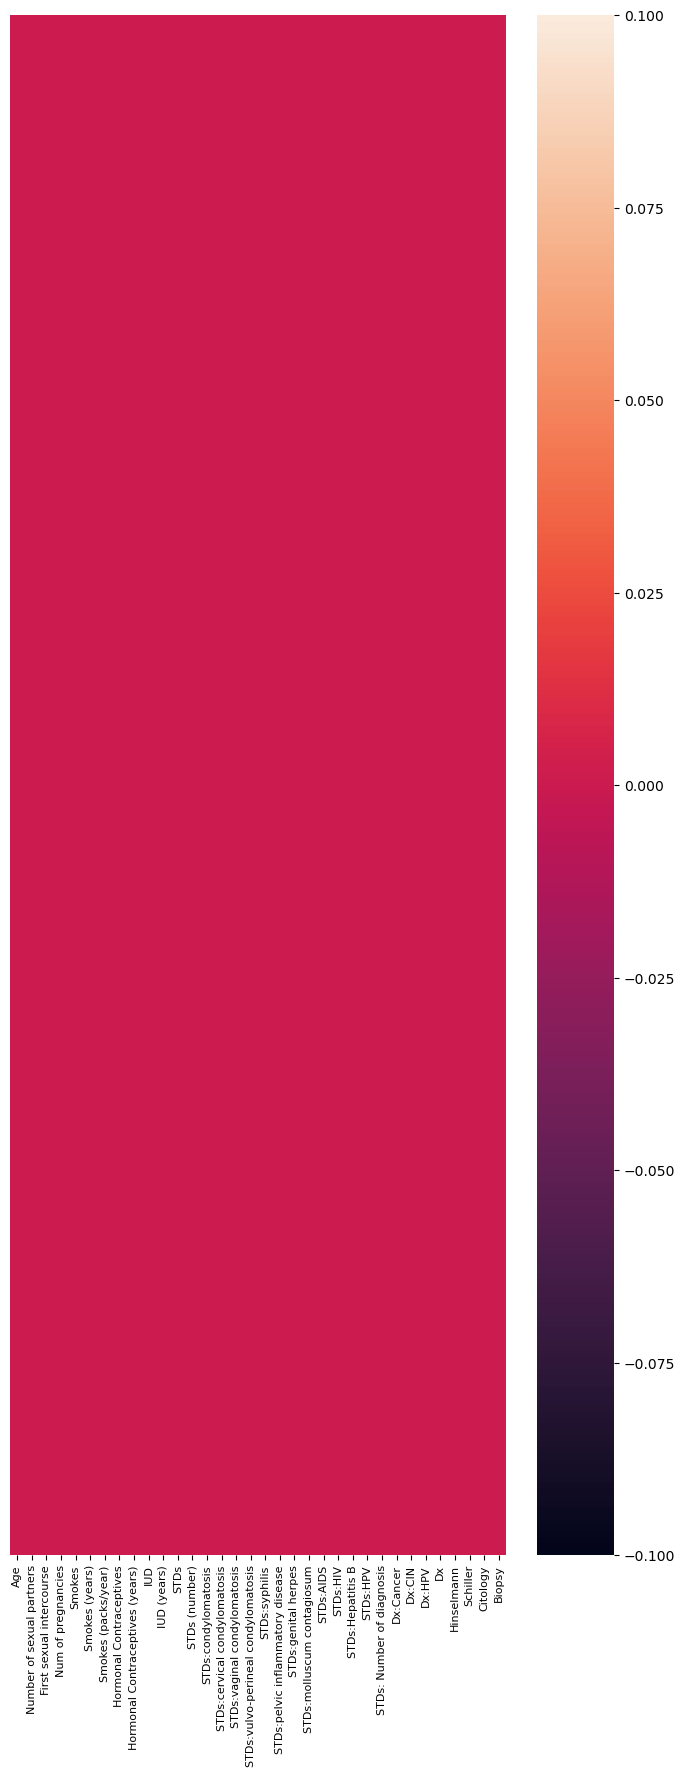

In [13]:
# PLOTTING HEATMAP AGAIN TO VISUALIZE AND CHECK OUR DATA CLEANING

plt.figure(figsize=(8,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

THUS WE CAN SEE THAT WE HAVE NO NULL VALUES NOW

In [14]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


THIS THE AGE RANGE FOR PEOPLE INVOLVED IN THE STUDY ARE : (13, 84)

### STEP 3: PERFORMING DATA VISUALIZATION

In [15]:
# WE'LL TRY TO OBSERVE THE CORELATION BETWEEN DIFFERENT FEATURES IN OUR DATASETS:

corr_matrix = cancer_df.corr()

corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


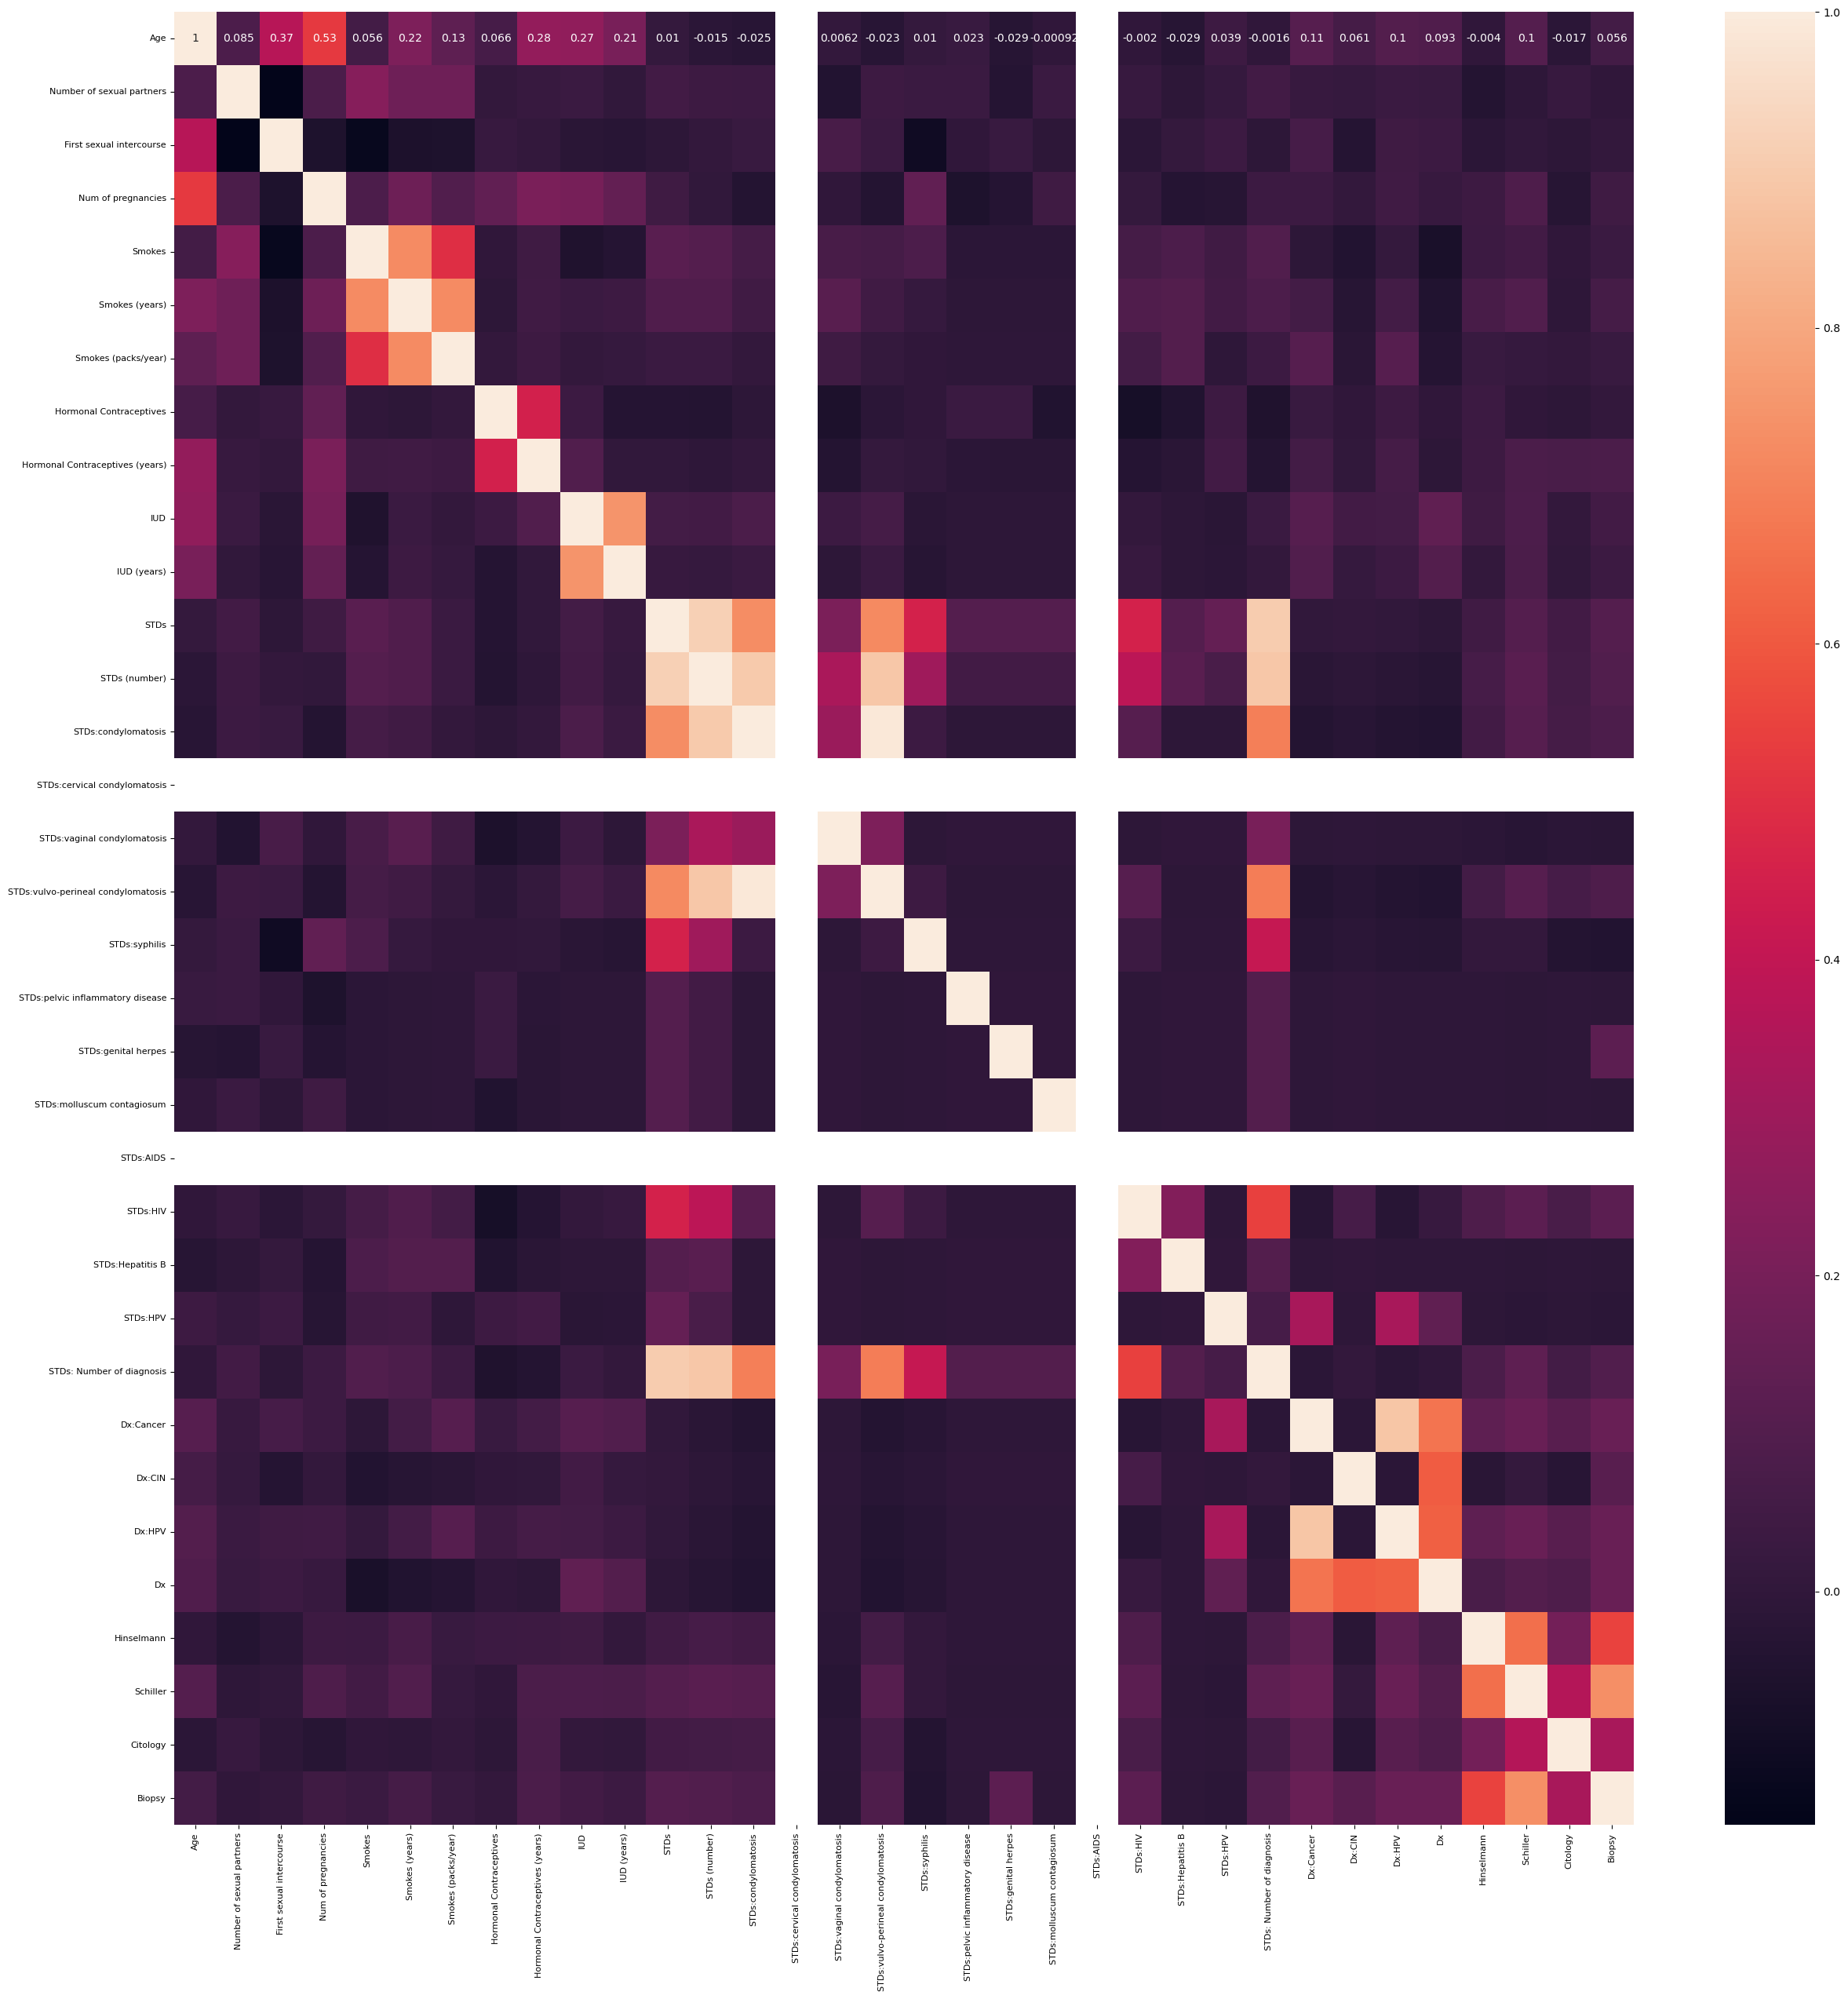

In [16]:
# PLOTTING THE HEATMAP FOR CORRELATION MATRIX

plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

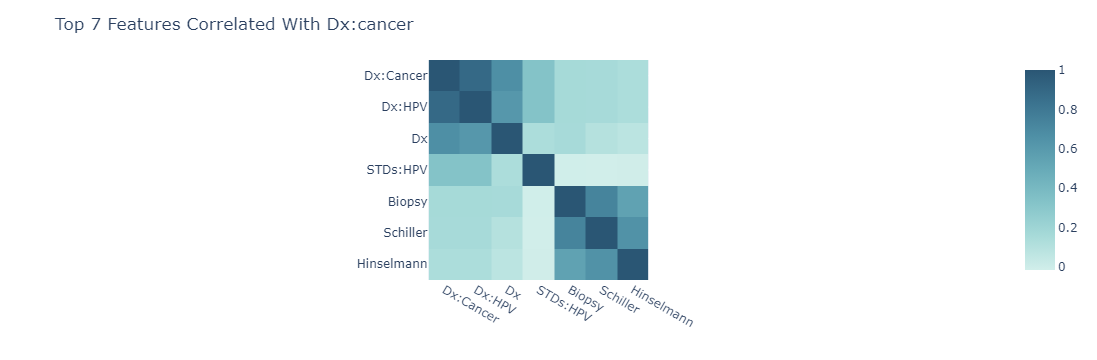

In [17]:
n = 7
target = "Dx:Cancer"
corr = cancer_df.select_dtypes(include=np.number).corr()

x = corr.nlargest(n,target).index
corr_df =  cancer_df[list(x)]
corr = corr_df.corr()
fig = px.imshow(corr,color_continuous_scale = "teal")
fig.update_layout(title="Top "+str(n)+" Features Correlated With "+str(target).capitalize())
fig.show()

Based on the heatmap, here are some observations that can be made:

1. Dx:Cancer: The target variable "Dx:Cancer" is positively correlated with "Dx:HPV", "Schiller", and "Biopsy", meaning that an increase in these features is associated with an increase in the risk of cervical cancer.

2. Dx:HPV: The feature "Dx:HPV" is positively correlated with "Dx:Cancer", meaning that a positive HPV test result is associated with an increased risk of cervical cancer.

3. Schiller: The feature "Schiller" is positively correlated with "Dx:Cancer", meaning that a positive Schiller test result is associated with an increased risk of cervical cancer.

4. Biopsy: The feature "Biopsy" is positively correlated with "Dx:Cancer", meaning that a positive biopsy result is associated with an increased risk of cervical cancer.

5. STDs:HPV: The feature "STDs:HPV" is positively correlated with "Dx:HPV", meaning that a history of HPV-related STDs is associated with an increased risk of a positive HPV test result.

6. total_tests: The feature "total_tests" is negatively correlated with "Dx:Cancer", meaning that an increased number of tests is associated with a decreased risk of cervical cancer.

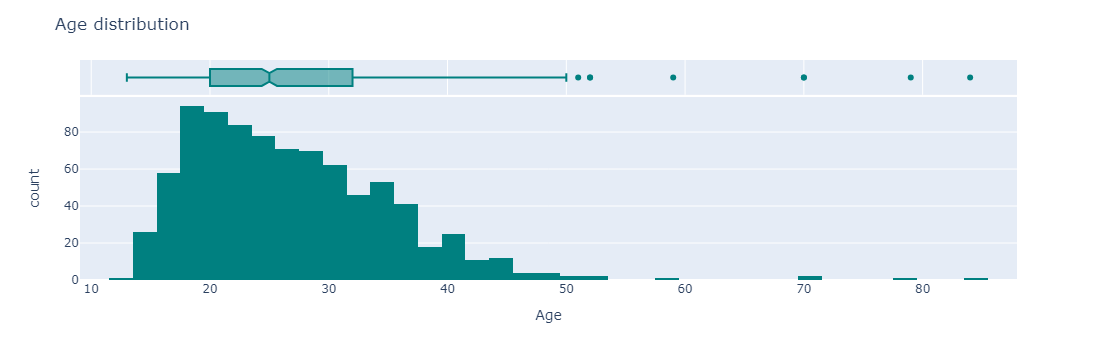

In [18]:
age_dist = px.histogram(cancer_df, x="Age", marginal="box", color_discrete_sequence=["teal"])
age_dist.update_layout(title="Age distribution")
age_dist.show()

Based on the histogram, here are some observations that can be made:

1. Age distribution: The histogram shows that the majority of the observations in the DataFrame are between the ages of 20 and 50. This suggests that cervical cancer is more common in younger women, which is consistent with what is known about the disease.

2. Mode: The mode of the Age distribution is around age 30. This means that the age group with the highest number of observations is the 30-34 age group.

3. Symmetry: The Age distribution appears to be slightly right-skewed, with a longer tail on the right side of the distribution. Which means that there are more observations in the younger age groups than in the older age groups. This is because the histogram has a longer tail on the right side, indicating that there are fewer observations in the older age groups.

4. Outliers: There are a few observations in the DataFrame that are older than age 70. These observations may represent outliers or rare cases of cervical cancer in older women.

### Pregnancy Distribution by Age

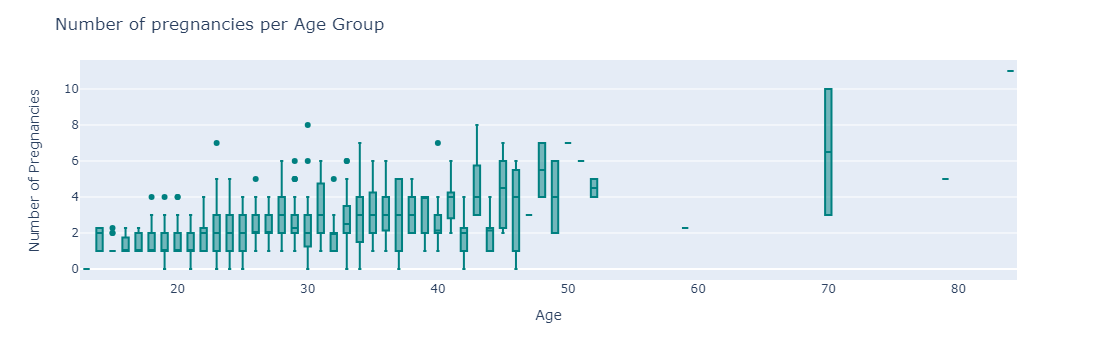

In [19]:
age_preg_bar = px.box(cancer_df.sort_values(by="Age",ascending=True), x="Age", y="Num of pregnancies",
                      color_discrete_sequence=["teal"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_preg_bar.update_xaxes(title="Age")
age_preg_bar.update_yaxes(title="Number of Pregnancies")
age_preg_bar.update_layout(title="Number of pregnancies per Age Group")
age_preg_bar.show()

There is a higher number of pregnancies in the twenties and thirties age groups compared to the other age groups. The box extends further up in these two groups compared to the others, which means there are more outliers (data points that fall outside the 1.5 IQR range) in these two groups.

Teenagers and women in their forties have a similar median number of pregnancies. The center line in the twenties and thirties boxes is higher than the center line in the teenager and forties boxes. This means the median number of pregnancies is higher in the twenties and thirties groups. For women in their forties, this might indicate a decline in fertility.

There is a wider range of pregnancies in the seventies and over age group compared to the other age groups. The box in this group is wider than the boxes in the other groups, which means the IQR (interquartile range) is larger in this group. However, it's crucial to consider the sample size here. If there are only a few individuals in the 70 and over group, and one or two have had an unusually high number of pregnancies throughout their lives, it could skew the median upwards.

Overall, the data suggests a trend of higher pregnancy rates in the twenties and thirties, followed by a decline. The wider range in the seventies and over group might be due to a small sample size and outliers.

### What are the risk factors for cervical cancer:

Risk factors for cervical cancer include:

1.	Human papillomavirus (HPV) infection: Certain types of HPV, particularly HPV-16 and HPV-18, are strongly associated with cervical cancer. Most important risk factor for cervical cancer. HPV is a group of viruses transmitted through sexual contact. Some high-risk HPV types can lead to cervical cell changes and cancer. Other STIs, such as chlamydia or gonorrhea, may also increase the risk of cervical cancer, although their association may not be as strong as with HPV. Prevention: HPV vaccination and safe sexual practices.

2.	Smoking: Women who smoke are at a higher risk of developing cervical cancer compared to non-smokers.

3.	Weakened immune system: Having a weakened immune system, such as due to HIV infection or immunosuppressive medications, increases the risk of cervical cancer.

4.	Early sexual activity: Engaging in sexual activity at an early age increases the risk of HPV infection, which in turn increases the risk of cervical cancer.

5.	Multiple sexual partners: Having multiple sexual partners increases the likelihood of HPV exposure and infection, thus increasing the risk of cervical cancer.

6.	Long-term use of oral contraceptives: Women who use oral contraceptives for an extended period, typically five years or more, have a higher risk of cervical cancer.

7.	Socioeconomic factors: Limited access to healthcare services and lack of regular cervical cancer screenings can also contribute to an increased risk of developing cervical cancer.

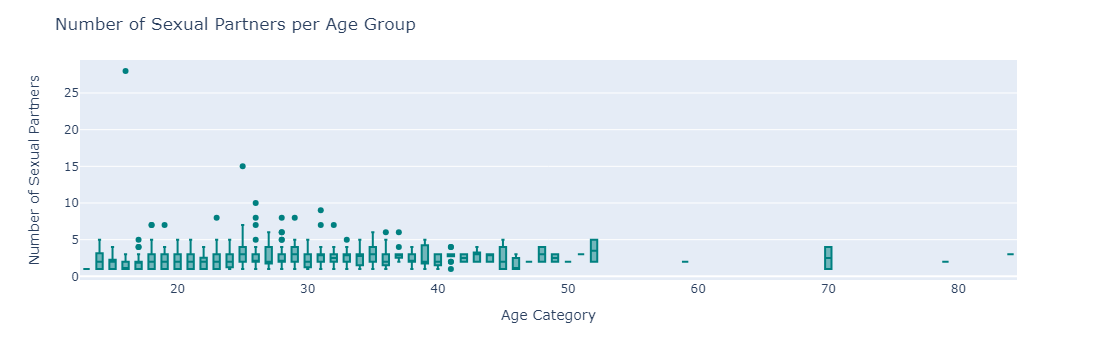

In [20]:
age_num_sex_partners = px.box(cancer_df.sort_values(by="Age",ascending=True), x="Age", y="Number of sexual partners",
                      color_discrete_sequence=["teal"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Number of Sexual Partners per Age Group")
age_num_sex_partners.show()

1. Higher Rates in Younger Age Groups: The diagram reveals a higher number of sexual partners in the twenties and thirties age groups compared to others. This is evident from the taller bars for these groups.

2. Outliers and Spread:  Pay attention to the boxplot's "whiskers" extending from the boxes. These represent outliers, data points that fall outside the 1.5 IQR (interquartile range) from the median. The presence of outliers, especially in the younger age groups, suggests that a few individuals might have a significantly higher number of partners compared to the majority. The width of the boxes also indicates the spread of data within each age group. A wider box signifies a larger range of reported sexual partners within that group.

3. HPV and Sexual Partners: It's important to consider the link between HPV and sexual partners. HPV, the human papillomavirus, is a sexually transmitted infection and a major risk factor for cervical cancer. Having a higher number of sexual partners increases your exposure to different HPV strains, potentially raising the risk of contracting the virus.

For instance, the seventies and over age group might have a wider range in the number of sexual partners compared to other groups.

Possible Limitations-
Sample Size: The diagram doesn't provide any information on the sample size. A small sample size might not be representative of the entire population.

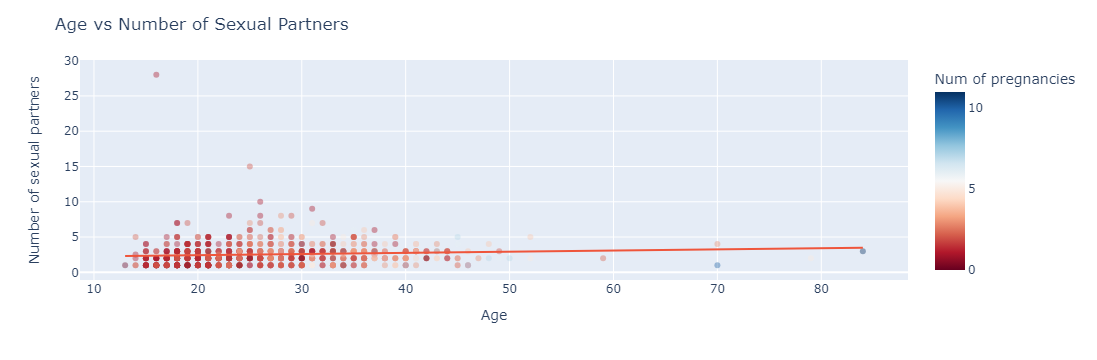

In [21]:
age_num_sex_partners = px.scatter(cancer_df, x="Age",
                                  y="Number of sexual partners",
                                  trendline="ols",
                                  opacity=0.4,
                                  color="Num of pregnancies",
                                  color_continuous_scale="rdbu",)
age_num_sex_partners.update_layout(title="Age vs Number of Sexual Partners")
age_num_sex_partners.show()

Based on the provided scatter plot, here are some observations that can be made:
1. Age: The Age variable ranges from 0 to 80 years, with a majority of the data points concentrated between the ages of 20 and 50.

2. Number of Sexual Partners: The Number of Sexual Partners variable ranges from 0 to 80, with a majority of the data points concentrated between 0 and 20.

3. Trendline: The trendline suggests a positive correlation between Age and Number of Sexual Partners, meaning that as Age increases, the Number of Sexual Partners also tends to increase.

4. Color-coding: The color-coding based on the Num of pregnancies column suggests that there is no clear relationship between the number of pregnancies and the Age and Number of Sexual Partners variables.

### Comparing the Number of Sexual Partners with the Diagnoses of HPV and Cervical Cancer

                           Dx:Cancer    Dx:HPV  Number of sexual partners
Dx:Cancer                   1.000000  0.886508                   0.022309
Dx:HPV                      0.886508  1.000000                   0.027264
Number of sexual partners   0.022309  0.027264                   1.000000


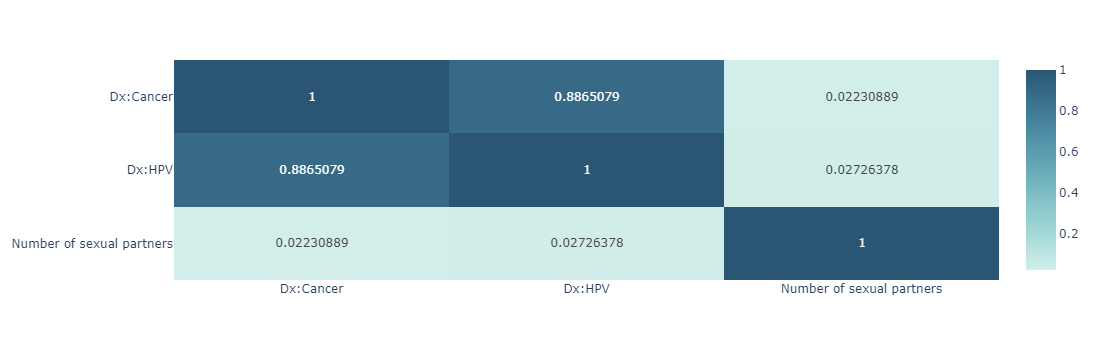

In [22]:
diagnoses_num_partner_compare_cols = ['Dx:Cancer',
                                      'Dx:HPV',
                                      "Number of sexual partners",]
corr_matrix = cancer_df[diagnoses_num_partner_compare_cols].corr()
print(corr_matrix)
diagnoses_num_partner_heatmap = px.imshow(corr_matrix,
                              aspect="auto",
                              color_continuous_scale="teal",
                              text_auto=True)
diagnoses_num_partner_heatmap.show()

From this matrix, we can infer the following:

1. There is a strong positive correlation (0.886508) between Dx:Cancer and Dx:HPV. This suggests that having HPV may increase the risk of developing cancer, which is consistent with existing scientific knowledge.

2. There is a weak positive correlation (0.023699 and 0.028646) between the number of sexual partners and both Dx:Cancer and Dx:HPV. This implies that having multiple sexual partners may slightly increase the risk of having HPV and developing cancer, but this correlation is quite weak. weak correlation does not necessarily mean that having multiple sexual partners causes HPV or cancer.

    HPV is a sexually transmitted infection, and having multiple sexual partners can increase the risk of exposure to HPV. However, there are many other factors that can influence the development of cancer, including genetics, lifestyle factors, and environmental exposures.
    Regarding the relationship between HPV and cancer, HPV infection can cause changes in cells that can lead to cancer over time. However, it is important to note that most HPV infections do not lead to cancer, and that the development of cancer is a complex process that involves many factors.
    In summary, while there is a weak positive correlation between the number of sexual partners and both Dx:Cancer and Dx:HPV, this correlation is quite small and does not necessarily imply causation.

3. Both Dx:Cancer and Dx:HPV have strong positive correlations with themselves (1.000000), which means  as one variable increases, the other variable also increases by the same proportion, and vice versa. This is known as a perfect positive correlation. However, the relationship between Dx:Cancer and the other two variables (HPV and number of sexual partners) is likely to be more complex and may involve other factors (like age, type of cancer, cancer treatment). In the case of Dx:HPV and number of sexual partners, it is expected that there would be a positive correlation since HPV is a sexually transmitted infection.

4. The correlation between Dx:Cancer and the number of sexual partners (0.023699) is weaker than the correlation between Dx:HPV and the number of sexual partners (0.028646). This suggests that the number of sexual partners may have a slightly stronger association with HPV than with cancer.

There is no linear relationship between the number of sexual partners and the diagnoses, it is still possible that there are other, more complex relationships between these variables. Further investigation is needed to identify these factors, as the number of sexual partners alone may not be a sufficient predictor of HPV or cervical cancer risk.
The diagram suggests that while there is a weak positive correlation between the number of sexual partners and the diagnoses, this correlation is quite small and does not necessarily imply causation. The number of sexual partners remained fairly consistent across age ranges, suggesting that there may be other factors that are more likely to be associated with HPV and cervical cancer than the number of sexual partners.

Overall, the diagram is comparing the number of sexual partners with the diagnoses of HPV and cervical cancer, and emphasizing the importance of considering multiple factors when analyzing complex health outcomes.

### CORRELATION OF DIAGNOSIS

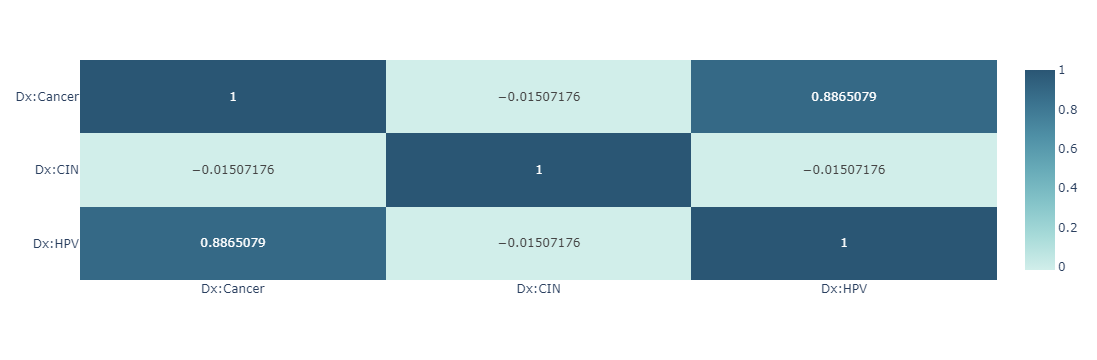

In [23]:
diagnoses_cols = ['Dx:Cancer',
                  'Dx:CIN',
                  'Dx:HPV']
diagnoses_corr_matrix = cancer_df[diagnoses_cols].corr()
# print(diagnoses_corr_matrix)
diagnoses_heatmap = px.imshow(diagnoses_corr_matrix, aspect="auto", color_continuous_scale="teal", text_auto=True)
diagnoses_heatmap.show()

Based on the provided context, a heatmap was generated to display the correlation matrix for three medical diagnoses: 'Dx: Cancer', 'DX:CIN', and 'Dx: HPV'. Correlation matrices are used to measure the relationships between different variables. In this case, the correlation values range from -1 to 1. 

A correlation value close to 1 indicates a strong positive correlation, meaning that as the value of one variable increases, the value of the other variable also tends to increase. A correlation value close to -1 indicates a strong negative correlation, meaning that as the value of one variable increases, the value of the other variable tends to decrease. A correlation value close to 0 suggests little to no relationship between the variables.

1. 'Dx: Cancer' has a strong positive correlation with 'DX:CIN' (0.8865079). This means that when there are more cases of abnormal cell growth in the cervix (CIN- cervical intraepithelial neoplasia ), there tends to be more cases of cancer.

2.
'Dx: Cancer' also has a moderate positive correlation with 'Dx: HPV' (0.8). This means that when there are more cases of HPV infection, there's a higher chance of developing cancer. HPV is a known cause of various cancers, including cervical cancer.
3. 
'DX:CIN' and 'Dx: HPV' show a weak negative correlation (-0.01507176). This suggests that there is no significant relationship between abnormal cell growth (CIN) and HPV infection. However, considering that the correlation is close to 0, this relationship is likely negligible.

## STD's Definitions

### Syphilis

Syphillis is a bacterial infection usually spread by sexual contact. The disease starts as a painless sore — typically on the genitals, rectum or mouth. Syphilis spreads from person to person via skin or mucous membrane contact with these sores.After the initial infection, the syphilis bacteria can remain inactive in the body for decades before becoming active again. Early syphilis can be cured, sometimes with a single shot (injection) of penicillin.Without treatment, syphilis can severely damage the heart, brain or other organs, and can be life-threatening. Syphilis can also be passed from mothers to unborn children. [Source](https://www.mayoclinic.org/diseases-conditions/syphilis/symptoms-causes/syc-20351756#:~:text=Syphilis%20is%20a,to%20unborn%20children.)

### HIV/AIDS

HIV (human immunodeficiency virus) is a virus that attacks cells that help the body fight infection, making a person more vulnerable to other infections and diseases. It is spread by contact with certain bodily fluids of a person with HIV, most commonly during unprotected sex (sex without a condom or HIV medicine to prevent or treat HIV), or through sharing injection drug equipment. *If left untreated, HIV can lead to the disease AIDS (acquired immunodeficiency syndrome* [Source](https://www.hiv.gov/hiv-basics/overview/about-hiv-and-aids/what-are-hiv-and-aids#:~:text=HIV%20(human,acquired%20immunodeficiency%20syndrome)

### Cervical / Vaginal Condylomatosis

Condyloma or genital warts affect the tissues of the genital area due to infections induced by Human papillomavirus. [Source](https://pubmed.ncbi.nlm.nih.gov/32389737/#:~:text=Condyloma%20or%20genital%20warts%20affect%20the%20tissues%20of%20the%20genital%20area%20due%20to%20infections%20induced%20by%20Human%20papillomavirus.)

### Vulvo-perineal condylomatosis
It is a benign epithelial proliferative viral lesion that can affect any area of the vulvo-perineal district supported by human papilloma virus (HPV). [Source](https://www.lriog.it/en/condilomatosi-vulvare/#:~:text=It%20is%20a%20benign%20epithelial%20proliferative%20viral%20lesion%20that%20can%20affect%20any%20area%20of%20the%20vulvo%2Dperineal%20district%20supported%20by%20human%20papilloma%20virus%20(HPV).)

### Genital Herpes

Genital herpes is a common sexually transmitted infection caused by the herpes simplex virus (HSV). Sexual contact is the primary way that the virus spreads. After the initial infection, the virus lies dormant in your body and can reactivate several times a year.
Genital herpes can cause pain, itching and sores in your genital area. But you may have no signs or symptoms of genital herpes. If infected, you can be contagious even if you have no visible sores.There's no cure for genital herpes, but medications can ease symptoms and reduce the risk of infecting others. Condoms also can help prevent the spread of a genital herpes infection. [Source](https://www.mayoclinic.org/diseases-conditions/genital-herpes/symptoms-causes/syc-20356161#:~:text=Genital%20herpes%20is,genital%20herpes%20infection.)

### HPV
HPV infection is a viral infection that commonly causes skin or mucous membrane growths (warts). There are more than 100 varieties of human papillomavirus (HPV). Some types of HPV infection cause warts, and some can cause different types of cancer.
Most HPV infections don't lead to cancer. But some types of genital HPV can cause cancer of the lower part of the uterus that connects to the vagina (cervix). Other types of cancers, including cancers of the anus, penis, vagina, vulva and back of the throat (oropharyngeal), have been linked to HPV infection.
These infections are often transmitted sexually or through other skin-to-skin contact. Vaccines can help protect against the strains of HPV most likely to cause genital warts or cervical cancer. [Source](https://www.mayoclinic.org/diseases-conditions/hpv-infection/symptoms-causes/syc-20351596#:~:text=HPV%20infection%20is,or%20cervical%20cancer.)

### Molluscum Contagisum 

Molluscum contagiosum is an infection caused by a poxvirus (molluscum contagiosum virus). The result of the infection is usually a benign, mild skin disease characterized by lesions (growths) that may appear anywhere on the body. Within 6-12 months, Molluscum contagiosum typically resolves without scarring but may take as long as 4 years.
The lesions, known as Mollusca, are small, raised, and usually white, pink, or flesh-colored with a dimple or pit in the center. They often have a pearly appearance. They’re usually smooth and firm. In most people, the lesions range from about the size of a pinhead to as large as a pencil eraser (2 to 5 millimeters in diameter). They may become itchy, sore, red, and/or swollen.
Mollusca may occur anywhere on the body including the face, neck, arms, legs, abdomen, and genital area, alone or in groups. The lesions are rarely found on the palms of the hands or the soles of the feet. [Source](https://www.cdc.gov/poxvirus/molluscum-contagiosum/index.html#:~:text=Molluscum%20contagiosum%20is,of%20the%20feet.)

The virus that causes molluscum spreads from direct person-to-person physical contact and through contaminated fomites. Fomites are inanimate objects that can become contaminated with virus; in the instance of molluscum contagiosum this can include linens such as clothing and towels, bathing sponges, pool equipment, and toys [Source](https://www.cdc.gov/poxvirus/molluscum-contagiosum/transmission.html#:~:text=The%20virus%20that,equipment%2C%20and%20toys)

Someone with molluscum can spread it to other parts of their body by touching or scratching a lesion and then touching their body somewhere else. This is called autoinoculation. Shaving and electrolysis can also spread mollusca to other parts of the body. *Molluscum can spread from one person to another by sexual contact. Many, but not all, cases of molluscum in adults are caused by sexual contact.* [Source](https://www.cdc.gov/poxvirus/molluscum-contagiosum/transmission.html#:~:text=Someone%20with%20molluscum%20can,caused%20by%20sexual%20contact.)

### Hepatitis B

Hepatitis B is a vaccine-preventable liver infection caused by the hepatitis B virus (HBV). Hepatitis B is spread when blood, semen, or other body fluids from a person infected with the virus enters the body of someone who is not infected. This can happen through sexual contact; sharing needles, syringes, or other drug-injection equipment; or from mother to baby at birth. [**Source**](https://www.cdc.gov/hepatitis/hbv/index.htm#:~:text=Hepatitis%20B%20is,baby%20at%20birth.)

In [24]:
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

cancer_df["total_std"] = cancer_df[list(std_cols)].sum(axis=1)
std_agg = cancer_df.groupby("Age", as_index=False)[list(std_cols)].sum()

In [25]:
test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
cancer_df["total_tests"] = cancer_df[test_cols].sum(axis = 1)

In [26]:
to_int_and_beyond = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

to_int_and_beyond = to_int_and_beyond.union(std_cols)

for col in to_int_and_beyond:
    cancer_df[col] = cancer_df[col].astype(int)

### SUM OF STD OCCURENCE ACROSS AGE CATEGORIES

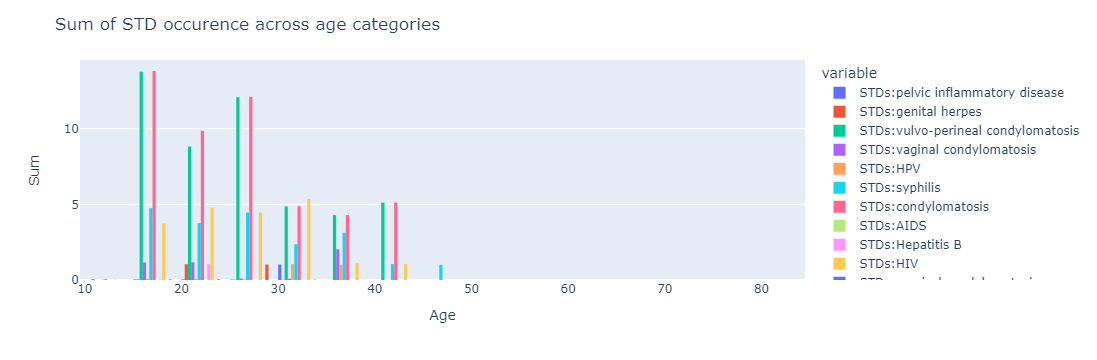

In [27]:
fig = px.histogram(std_agg, x="Age", y=list(std_cols), barmode="group", histfunc="sum")
fig.update_layout(title="Sum of STD occurence across age categories")
fig.update_xaxes(title="Age")
fig.update_yaxes(title="Sum")
fig.show()

The sum of occurrences of STDs peaks at the age of 20.

The sum of occurrences of STDs starts to decline from the age of 30 onwards
.
The three STDs with highest sum of occurence are vulvo-perineal condylomatosis (with a sum of occurrences of 13.8), condylomatosis  (with a sum of occurrences of 12), and syphilis (with a sum of occurrences of 5).

### COUNT OF WOMEN ACROSS AGE GROUP WHO HAVE HAD ONE OR MORE STD

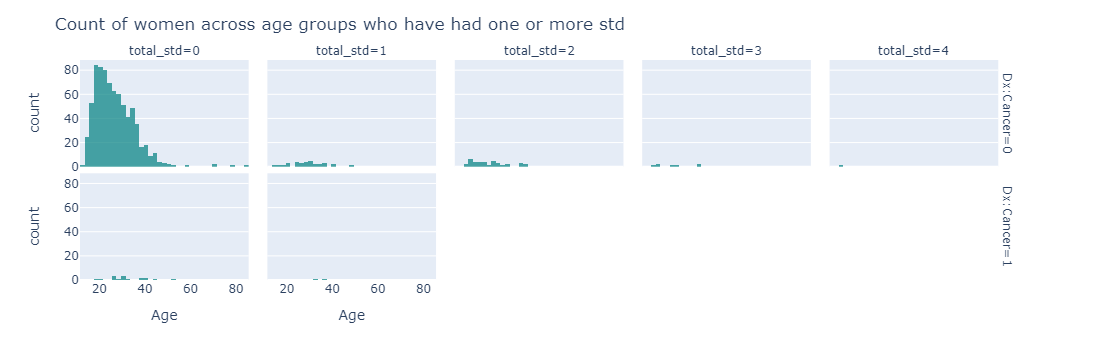

In [28]:
fig = px.histogram(cancer_df.query("total_std>=0").sort_values(by=["total_std", "Dx:Cancer"], ascending=True),
                   x="Age",
                   facet_col="total_std",
                   facet_row="Dx:Cancer",
                   color_discrete_sequence=["teal"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more std")

fig.show()

Here's what can be inferred from the histogram:

1. For women with a cancer diagnosis (Cancer=1), the highest count of women with STDs is observed in the 25-60 age group. This suggests that middle-aged women with a cancer diagnosis have a higher prevalence of STDs, which could be due to increased sexual activity, less experience with safe sexual practices, or less access to sexual health education and resources.

2. For women without a cancer diagnosis (Cancer=0), the peak count of women without STDs is in the 20-21 age group, and then it gradually decreases as age increases. This could be due to decreased sexual activity or improved health and healthcare access as people age.

3. The histogram reveals that the count of women with multiple STDs (total_std>=2) is relatively low compared to those with a single STD (total_std=1) in both facets. This might indicate that the likelihood of having multiple STDs decreases as the number of STDs increases.

Here's what the total_std values represent:

1. total_std=0: Women who have not had any STDs.
2. total_std=1: Women who have had one STD.
3. total_std=2: Women who have had two STDs.
4. total_std=3: Women who have had three STDs.
5. total_std=4: Women who have had four or more STDs.

In summary, the histogram shows that the count of women with STDs in the Cancer=1 facet peaks around the 30-60 age group, while the count of women without STDs in theCancer=0 facet peaks around the 20-21 age group. The count of women with multiple STDs is relatively low compared to those with a single STD in both facets.

## Tests used 
Here we observe the number of tests done by patients to determine if they have Cerivcal Cancer / HPV.

The tests used were: 

### Hinselmann

A colposcopy is a type of cervical cancer test. It lets your doctor or nurse get a close-up look at your cervix — the opening to your uterus. It’s used to find abnormal cells in your cervix. [Source](https://www.plannedparenthood.org/learn/cancer/cervical-cancer/what-colposcopy)

### Citology
Cytology is the exam of a single cell type, as often found in fluid specimens. It's mainly used to diagnose or screen for cancer. It's also used to screen for fetal abnormalities, for pap smears, to diagnose infectious organisms, and in other screening and diagnostic areas. [Source](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cytology#:~:text=Cytology%20is%20the%20exam%20of,other%20screening%20and%20diagnostic%20areas.)
### Biopsy
A cervical biopsy is a procedure to remove tissue from the cervix to test for abnormal or precancerous conditions, or cervical cancer. [Source](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cervical-biopsy#:~:text=What%20is%20a%20cervical%20biopsy,that%20opens%20into%20the%20vagina.)
### Schiller
A test in which iodine is applied to the cervix. The iodine colors healthy cells brown; abnormal cells remain unstained, usually appearing white or yellow. [Source](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/schiller-test)


### COUNT OF WOMEN ACROSS AGE GROUP WHO HAVE HAD ONE OR MORE TESTS

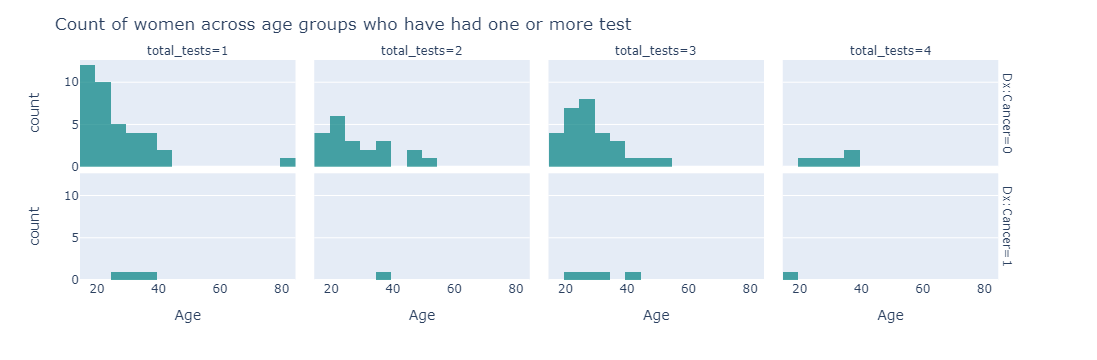

In [29]:
fig = px.histogram(cancer_df.query("total_tests>0").sort_values(by="total_tests", ascending=True),
                   x="Age",
                   facet_col="total_tests",
                   facet_row="Dx:Cancer",
                   color_discrete_sequence=["teal"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more test")

fig.show()

The histogram is divided into two facets based on the cancer status: one for women who have had no cancer diagnosis (Dx: Cancer=0) and another for women who have had a cancer diagnosis (Dx: Cancer=1). 

The inferences from this histogram is that:

1. For women without cervical cancer (Dx: Cancer=0), the count of women peaks around the age of 20-30 and then gradually falls as the age increases. This could be attributed to factors such as increased awareness and regular testing among younger women or the possibility that younger women might be more sexually active, leading them to perform tests to check for cervical cancer or sexually transmitted diseases (STDs).
2. 
For women with cervical cancer (Dx: Cancer=1), the count of women peaks around the age of 19-35. This could be due to various factors, such as delayed diagnosis, socioeconomic factors, or lifestyle choices that increase the risk of cervical cancer in this age group. Additionally, women in this age group might have taken multiple tests due to increased awareness, follow-up tests after abnormal results, or monitoring after treatment

3. The count of women with cervical cancer (Dx: Cancer=1) is lower than those without cervical cancer (Dx: Cancer=0) across all age groups and for all numbers of tests taken.

4. In the 'total_tests = 4' subplot for Dx: Cancer=1, there are women in the age group 19. This could indicate a rare occurrence or an anomaly in the dataset.

5. The 'total_tests = 2' subplot has a higher count of women in their 20s and 30s compared to the other subplots. This could suggest that more women in these age groups have had two cervical cancer tests..

### ECDF PLOT

An ECDF is an estimator of the Cumulative Distribution Function. The ECDF essentially allows you to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set.

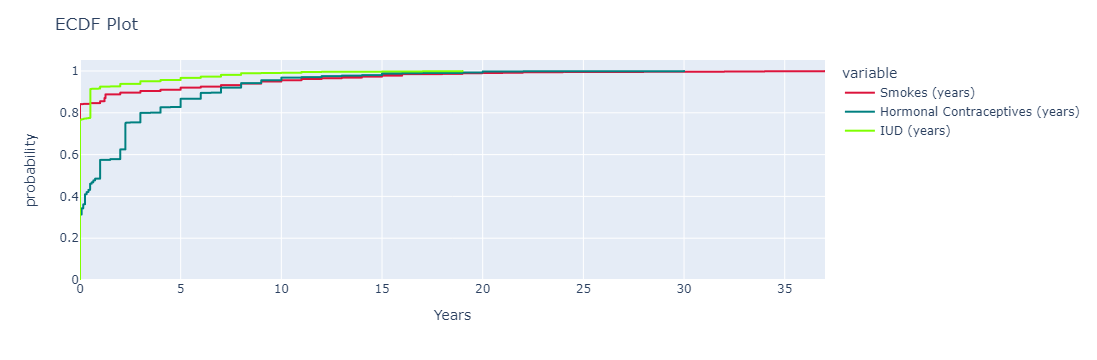

In [30]:
fig = px.ecdf(cancer_df, x=["Smokes (years)",
                                 "Hormonal Contraceptives (years)",
                                 "IUD (years)"],
              color_discrete_sequence=["crimson", "teal", "chartreuse"])
fig.update_xaxes(title="Years")
fig.update_layout(title="ECDF Plot")
fig.show()

From the diagram, you can make the following inferences:

1. Smokes (years): there is a 92% probability that patients have smoked for atleast 6 years or less.

2. Hormonal Contraceptives (years):  there is a 95% probability that patients have used hormonal contraceptives for atleast 10 years or less. The curve is relatively steep, indicating a more rapid increase in the number of women using hormonal contraceptives compared to smoking.

3. IUD (years): This suggests that there is a 99% probability that patients have used an IUD for atleast 9 year or less. The curve is relatively smooth, indicating a consistent increase in the number of women using IUDs over time.

## Proportions of women who have Cervical Cancer / HPV

This represents the proportion of women by age category who were diagnosed with Cervical Cancer/ HPV. It is seen that women in their 30's have the most prevalance of Cervical Cancer and HPV, followed by women in their 20's.

It is also seen that of all the samples taken, approximately 26% are of women in their 30's. With respect to the women who have cervical cancer, approximately 44% of cases are women in their 30's, also, out of the women who have HPV, approximately 39% of women are in their 30's. This is contrasted with 45% of all samples being women in their 20's and only 28% of the women have cancer are in their 20's, HPV is more comparable at 33%.

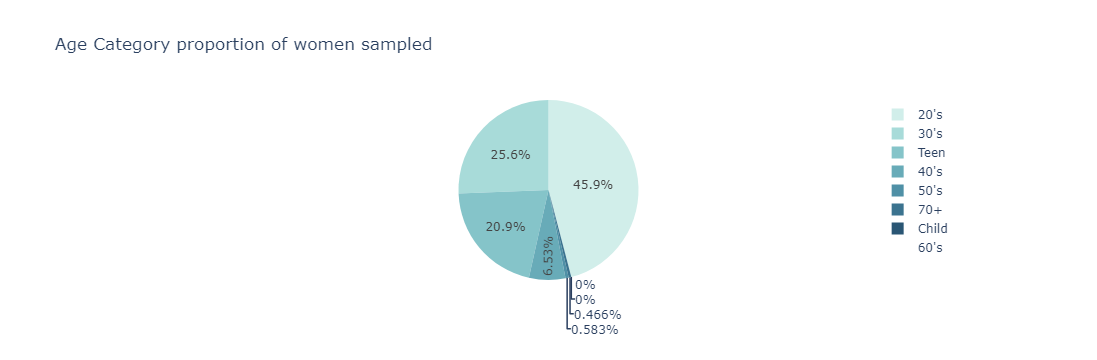

,Category,Sample Proportion
0,Child,0.000000
1,Teen,0.208625
2,20's,0.459207
3,30's,0.256410
4,40's,0.065268
5,50's,0.005828
6,60's,0.000000
7,70+,0.004662


In [31]:
age_category_range = {
    "Age<12": "Child",
    "Age>=12 & Age<20": "Teen",
    "Age>=20 & Age<30": "20's",
    "Age>=30 & Age<40": "30's",
    "Age>=40 & Age<50": "40's",
    "Age>=50 & Age<60": "50's",
    "Age>=60 & Age<70": "60's",
    "Age>=70": "70+"}
age_prop_dict = {}
col = "Age"  # Just to get the count
for age_range, category in age_category_range.items():
    age_prop_dict[category] = cancer_df.query(age_range)[col].count() / len(cancer_df)

proportion_samples_df = pd.DataFrame.from_dict(age_prop_dict, orient="index",
                                               columns=[ "Sample Proportion"])
proportion_samples_df = proportion_samples_df.reset_index()
proportion_samples_df.columns = proportion_samples_df.columns.str.replace("index","Category")
fig = px.pie(proportion_samples_df,
             values='Sample Proportion',
             names="Category",
             title='Age Category proportion of women sampled',color_discrete_sequence=px.colors.sequential.Teal)
fig.show()
proportion_samples_df

From the diagram, you can make the following inferences:

1. The largest proportion of women sampled falls into the 20's age category, with a sample proportion of approximately 45.9%. This is followed by the 30's age category, with a sample proportion of approximately 25.6%.

2. The age categories with the smallest sample proportions are Child and 60's, both with a sample proportion of 0%. The 50's age category has a sample proportion of approximately 0.583%, and the 70+ age category has a sample proportion of approximately 0.466%.

3. The age category with the third-highest sample proportion is Teen, with a sample proportion of approximately 20.9%.

4. The age category with the fourth-highest sample proportion is 40's, with a sample proportion of approximately 5.53%.

In [32]:
import pandas as pd
import plotly.express as px

# Assuming 'cancer_df' is the DataFrame containing the data
# Assuming 'age_category_range' is the dictionary defining age category ranges

# Initialize dictionaries to store counts of women with cancer and HPV for each age category
cancer_count_dict = {}
hpv_count_dict = {}

# Calculate counts of women with cancer and HPV for each age category
for age_range, category in age_category_range.items():
    # Count of women with cancer in the age category
    cancer_count = cancer_df.query(f"{age_range} & `Dx:Cancer` == 1")["Age"].count()
    # Count of women with HPV in the age category
    hpv_count = cancer_df.query(f"{age_range} & `Dx:HPV` == 1")["Age"].count()
    
    # Store counts in dictionaries
    cancer_count_dict[category] = cancer_count
    hpv_count_dict[category] = hpv_count

# Convert dictionaries to DataFrames
cancer_count_df = pd.DataFrame.from_dict(cancer_count_dict, orient="index", columns=["Cancer Count"])
hpv_count_df = pd.DataFrame.from_dict(hpv_count_dict, orient="index", columns=["HPV Count"])

# Reset index of DataFrames
cancer_count_df.reset_index(inplace=True)
cancer_count_df.rename(columns={"index": "Age Category"}, inplace=True)

hpv_count_df.reset_index(inplace=True)
hpv_count_df.rename(columns={"index": "Age Category"}, inplace=True)

# Display the count of women with cancer across age categories
print("Count of women with cancer across age categories:")
print(cancer_count_df)

# Display the count of women with HPV across age categories
print("\nCount of women with HPV across age categories:")
print(hpv_count_df)


Count of women with cancer across age categories:
  Age Category  Cancer Count
0        Child             0
1         Teen             1
2         20's             5
3         30's             8
4         40's             3
5         50's             1
6         60's             0
7          70+             0

Count of women with HPV across age categories:
  Age Category  HPV Count
0        Child          0
1         Teen          1
2         20's          6
3         30's          7
4         40's          3
5         50's          1
6         60's          0
7          70+          0


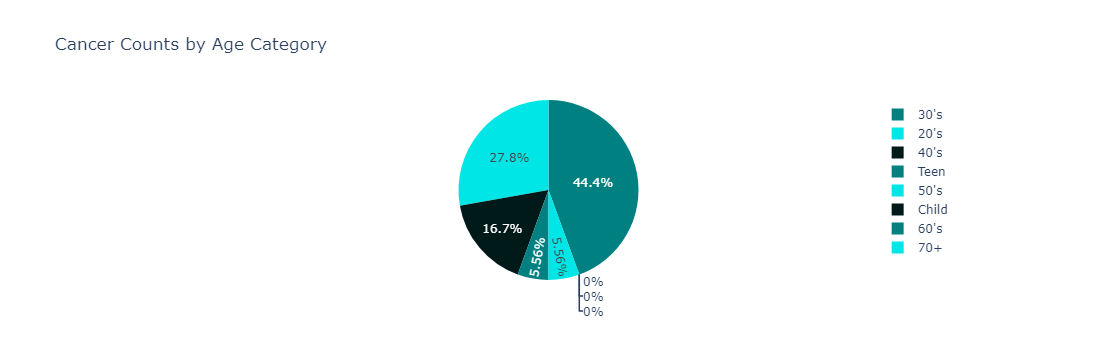

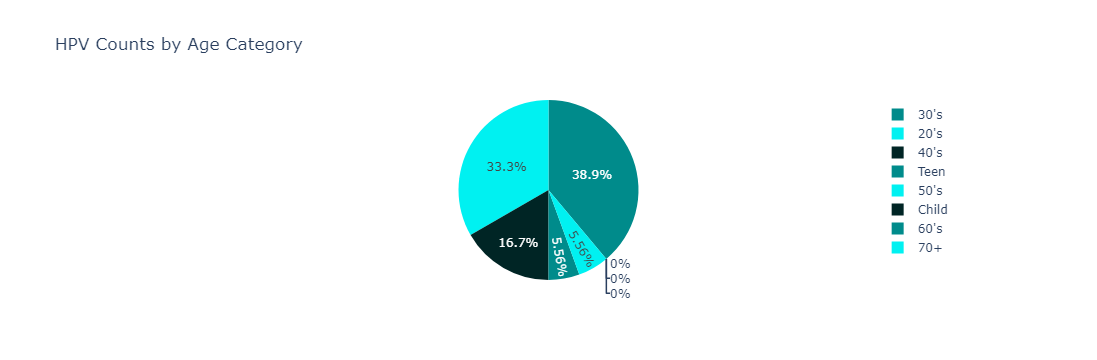

In [33]:
import pandas as pd
import plotly.express as px

# Assuming 'cancer_df' is the DataFrame containing the data
# Assuming 'age_category_range' is the dictionary defining age category ranges

# Initialize dictionaries to store counts of women with cancer and HPV for each age category
cancer_count_dict = {}
hpv_count_dict = {}

# Calculate counts of women with cancer and HPV for each age category
for age_range, category in age_category_range.items():
    # Count of women with cancer in the age category
    cancer_count = cancer_df.query(f"{age_range} & `Dx:Cancer` == 1")["Age"].count()
    # Count of women with HPV in the age category
    hpv_count = cancer_df.query(f"{age_range} & `Dx:HPV` == 1")["Age"].count()
    
    # Store counts in dictionaries
    cancer_count_dict[category] = cancer_count
    hpv_count_dict[category] = hpv_count

# Convert dictionaries to DataFrames
cancer_count_df = pd.DataFrame.from_dict(cancer_count_dict, orient="index", columns=["Cancer Count"])
hpv_count_df = pd.DataFrame.from_dict(hpv_count_dict, orient="index", columns=["HPV Count"])

# Reset index of DataFrames
cancer_count_df.reset_index(inplace=True)
cancer_count_df.rename(columns={"index": "Age Category"}, inplace=True)

hpv_count_df.reset_index(inplace=True)
hpv_count_df.rename(columns={"index": "Age Category"}, inplace=True)

# Set colors for cancer and HPV pie charts
cancer_color = 'teal'
hpv_color = 'darkcyan'

# Create pie chart for cancer counts with teal color
fig_cancer = px.pie(cancer_count_df, values='Cancer Count', names='Age Category', title='Cancer Counts by Age Category', color_discrete_sequence=[cancer_color])

# Create pie chart for HPV counts with a shade close to teal
fig_hpv = px.pie(hpv_count_df, values='HPV Count', names='Age Category', title='HPV Counts by Age Category', color_discrete_sequence=[hpv_color])

# Show the pie charts
fig_cancer.show()
fig_hpv.show()


Cancer Counts by Age Category:

1. The largest proportion of cancer cases is found in the 30's age category, with a count of approximately 27.8%. This suggests that women in their 30s have the highest incidence of cancer among the age categories.

2. The 50's age category has the second-highest cancer count, with approximately 16.7%.

3. The age categories with the lowest cancer counts are Teen, Child, and 70+, with counts of approximately 44.4%, 5.56%, and 5.56%, respectively. These low counts suggest that the incidence of cancer is relatively low in these age categories.

HPV Counts by Age Category:

1. The highest HPV count is found in the 30's age category, with a count of approximately 44.4%. This suggests that women in their 30s have the highest incidence of HPV among the age categories.

2.The 20's age category has the second-highest HPV count, with approximately 16.7%.

3. The age categories with the lowest HPV counts are Teen, Child, and 70+, with counts of approximately 50%, 0%, and 0%, respectively. These low counts suggest that the incidence of HPV is relatively low in these age categories.

In summary, the diagram shows that the incidence of cancer and HPV is highest in the 30's age category, followed by the 50's for cancer and the 20's for HPV. The incidence of both cancer and HPV is relatively low in the Teen, Child, and 70+ age categories.

## Contraceptive Overview
### IUD 
IUD stands for Intrauterine Device (basically: a device inside your uterus). It's a small piece of flexible plastic shaped like a T. Sometimes it’s called an IUC — intrauterine contraception. Can cost up to $1,300.00 USD

IUDs are divided into 2 types:

* Hormonal IUDs 
* Copper IUDs 

Both copper IUDs and hormonal IUDs prevent pregnancy by changing the way sperm cells move so they can't get to an egg. If sperm can’t make it to an egg, pregnancy can’t happen. [Source](https://www.plannedparenthood.org/learn/birth-control/iud)

### Hormonal Contraceptive 

* The birth control pill works by stopping sperm from joining with an egg. When sperm joins with an egg it’s called fertilization.

* The hormones in the pill safely stop ovulation. No ovulation means there’s no egg for sperm to fertilize, so pregnancy can’t happen.

* The pill’s hormones also thicken the mucus on the cervix. This thicker cervical mucus blocks sperm so it can’t swim to an egg — kind of like a sticky security guard.

* Can cost up to $50.00 USD. [Source](https://www.plannedparenthood.org/learn/birth-control/birth-control-pill)

## Hormonal Contraceptives and Cervical Cancer

Women who have used oral contraceptives for 5 or more years have a higher risk of cervical cancer than women who have never used oral contraceptives. The longer a woman uses oral contraceptives, the greater the increase in her risk of cervical cancer. One study found a 10% increased risk for less than 5 years of use, a 60% increased risk with 5–9 years of use, and a doubling of the risk with 10 or more years of use. However, the risk of cervical cancer has been found to decline over time after women stop using oral contraceptives. [Source](https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#r12:~:text=Women%20who%20have%20used,stop%20using%20oral%20contraceptives%20()

The usage of hormonal contraceptives is significantly higher than the usage of IUD's, this can most likely be attributed to it's low cost and easy accessibility

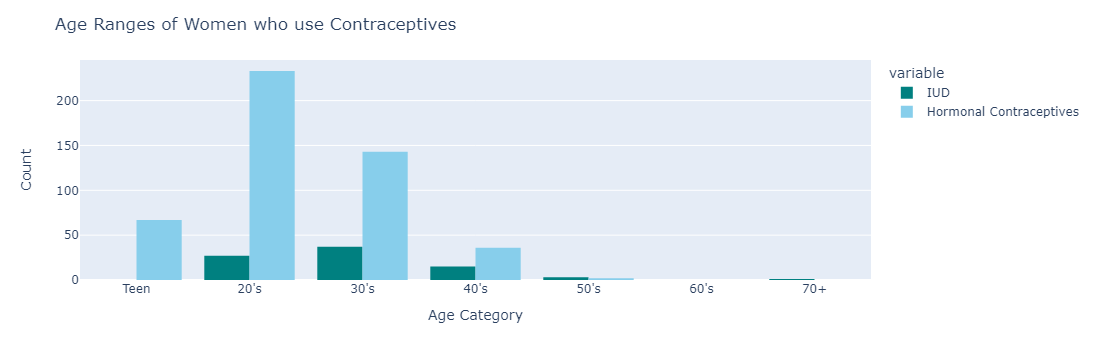

In [34]:
import pandas as pd
import plotly.express as px

# Assuming 'age_category_range' is the dictionary defining age category ranges

# Initialize a list to store DataFrames for each age category
age_category_dfs = []

# Iterate over age category ranges and calculate contraceptive usage counts
for age_range, category in age_category_range.items():
    # Filter DataFrame for the current age category range
    age_category_df = cancer_df.query(f"{age_range}")
    
    # Count of women using IUD and hormonal contraceptives in the age category
    iud_count = age_category_df["IUD"].sum()
    hormonal_count = age_category_df["Hormonal Contraceptives"].sum()
    
    # Create a DataFrame for the current age category
    age_category_df = pd.DataFrame({"Age": [category], "IUD": [iud_count], "Hormonal Contraceptives": [hormonal_count]})
    
    # Append the DataFrame to the list
    age_category_dfs.append(age_category_df)

# Concatenate DataFrames vertically
age_category_comparison = pd.concat(age_category_dfs, ignore_index=True)

# Create histogram with age ranges and contraceptive usage counts
fig = px.histogram(age_category_comparison, x="Age", y=["IUD", "Hormonal Contraceptives"], barmode="group",
                   color_discrete_sequence=["teal", "skyblue"])

# Update axis labels and title
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of Women who use Contraceptives")

# Show the histogram
fig.show()


Key insights from the diagram:

1. Hormonal contraceptive use is more prevalent than IUD use across all age ranges. This is evident as the hormonal contraceptive values are consistently higher than the IUD values in the diagram.

2. The use of both IUDs and hormonal contraceptives decreases as age increases. This trend is visible for both types of contraceptives, with the highest values observed in the younger age ranges and the lowest values in the older age ranges.

3. The decline in the usage of IUDs and hormonal contraceptives is gradual.

4. The usage of IUDs is relatively low compared to hormonal contraceptives, but it remains relatively stable across the age ranges, with a slight increase in usage in the 30s age group

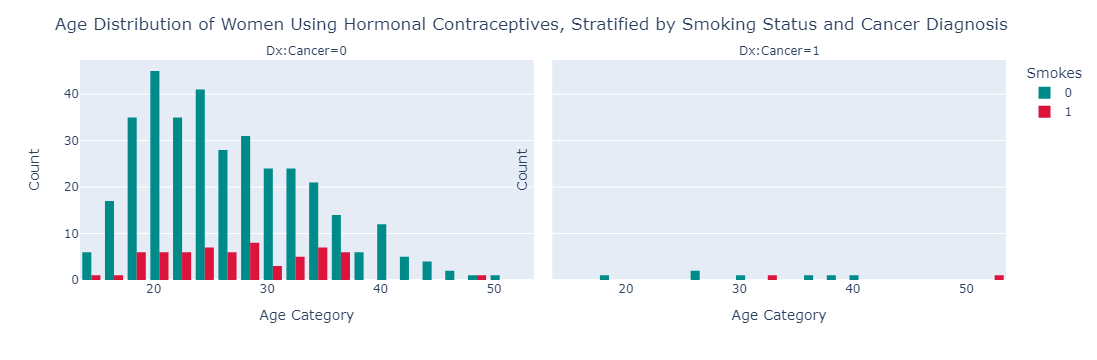

In [35]:
df_hormonal_contraceptives = cancer_df[
    (cancer_df["Hormonal Contraceptives"] == 1) & (cancer_df["IUD"] == 0)]
df_hormonal_contraceptives = df_hormonal_contraceptives.sort_values(by=["Smokes", "Dx:Cancer"])
fig = px.histogram(df_hormonal_contraceptives, x="Age", color="Smokes", barmode="group", facet_col="Dx:Cancer",
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Distribution of Women Using Hormonal Contraceptives, Stratified by Smoking Status and Cancer Diagnosis")
# fig.for_each_annotation(lambda a: a.update(text=a.text.split(":")[-1]))
fig.show()

From the diagram, you can infer the following:

1. The distribution of ages of women who use hormonal contraceptives and do not use IUDs is shown for both smokers and non-smokers, as well as for women with and without a cancer diagnosis. Factors such as socioeconomic status, access to healthcare, and sexual behavior might influence the distribution.

2. The majority of women in the dataset are non-smokers, as indicated by the higher bar heights in the darkcyan color compared to the crimson color. Factors like health awareness and lifestyle choices might contribute to the higher proportion of non-smokers.

3. The age distribution of women without a cancer diagnosis (Dx:Cancer=0) is generally higher than that of women with a cancer diagnosis (Dx:Cancer=1). This could suggest that using hormonal contraceptives might be associated with a lower risk of cancer, but this is not definitive proof, as the dataset might not be representative of the general population, and other factors, such as HPV infection, sexual behavior, and socioeconomic status, could influence the results.

4. The age distribution of non-smokers is higher than that of smokers in both the cancer and non-cancer groups. This suggests that smoking might be associated with an increased risk of cancer or other health issues, leading to a lower representation of smokers in the dataset. Factors like smoking prevalence, health awareness, and lifestyle choices might contribute to the difference in distribution between smokers and non-smokers.

5. The age distribution of women in the dataset is generally higher in the non-cancer group, with a peak around the age of 20-29 for non-smokers and a smaller peak across all the age groups for smokers. Factors such as age at first sexual intercourse, number of sexual partners, and condom use might influence the distribution.
   
6. In the cancer group, the distribution is lower and more uniform, with a slight increase in the number of women around the age of 25-29 who are non-smokers but have cancer and might use hormonal contraceptives. And there is a slight peak in the 30s and 50s age group for smokers who use contraceptives and have cancer. Factors like HPV infection, sexual behavior, and socioeconomic status might influence the distribution in the cancer group.

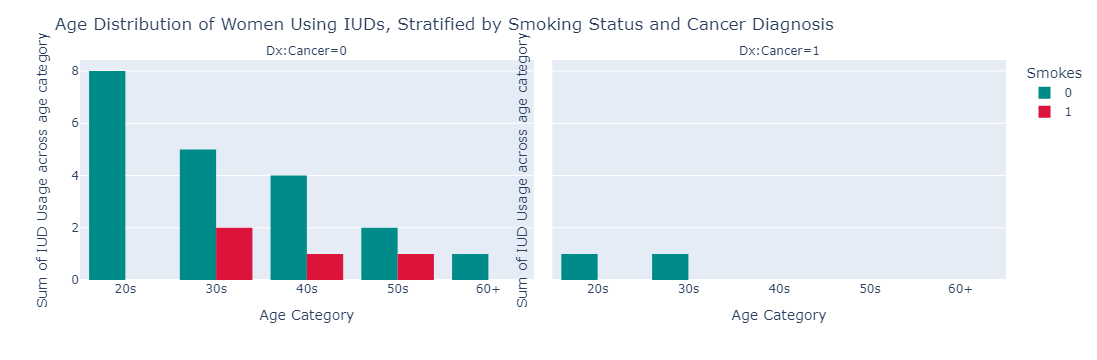

In [36]:
import pandas as pd
import plotly.express as px

# Filter DataFrame for women with Hormonal Contraceptives=0 and IUD=1
df_IUD_contraceptives = cancer_df[(cancer_df["Hormonal Contraceptives"] == 0) & (cancer_df["IUD"] == 1)]

# Categorize age into age ranges
def categorize_age(age):
    if age < 20:
        return "Teen"
    elif age < 30:
        return "20s"
    elif age < 40:
        return "30s"
    elif age < 50:
        return "40s"
    elif age < 60:
        return "50s"
    else:
        return "60+"

df_IUD_contraceptives["Age_Category"] = df_IUD_contraceptives["Age"].apply(categorize_age)

# Sort DataFrame
df_IUD_contraceptives = df_IUD_contraceptives.sort_values(by=["Smokes", "Dx:Cancer"], ascending=True)

# Specify the order of age categories
age_order = ["Teen", "20s", "30s", "40s", "50s", "60+"]

# Create histogram with age categories and count of women who use IUD
fig = px.histogram(df_IUD_contraceptives, x="Age_Category", color="Smokes", barmode="group", facet_col="Dx:Cancer",
                   color_discrete_sequence=["darkcyan", "crimson"], category_orders={"Age_Category": age_order})

# Update axis labels and title
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum of IUD Usage across age category")
fig.update_layout(title="Age Distribution of Women Using IUDs, Stratified by Smoking Status and Cancer Diagnosis")

# Show the histogram
fig.show()


From the given diagram, you can infer the following:

1. In the non-cancer group (Dx:Cancer=0), the majority of women are non-smokers, as indicated by the higher count in the 'Smokes=0' category compared to the 'Smokes=1' category. This suggests that smoking might be associated with an increased risk of cancer or other health issues, leading to a lower representation of smokers in the non-cancer group.

2. In the cancer group (Dx:Cancer=1), the count in the 'Smokes=0' category is high for the 20s and 30s age ranges. This might indicate that non-smoking women who use IUDs and do not use hormonal contraceptives could still have an increased risk of cancer in their 20s and 30s, but further analysis is required to establish a definitive relationship due to the small sample size.

3. The age distribution of women in the non-cancer group (Dx:Cancer=0) is generally higher than that of women in the cancer group (Dx:Cancer=1). This could suggest that using IUDs might be associated with a lower risk of cancer, but this is not definitive proof, as the dataset might not be representative of the general population, and other factors could influence the results.

4. In the cancer group (Dx:Cancer=1), the distribution of non-smokers decreases after the 30s age group, while smokers are not present in the dataset. This might indicate that the risk of cancer in women who use IUDs and do not use hormonal contraceptives is higher in the 20s and 30s for non-smokers, but the absence of smokers in the cancer group makes it difficult todraw conclusions about the relationship between smoking and cancer risk in this specific population.

5. The distribution of smokers and non-smokers in the non-cancer group (Dx:Cancer=0) is relatively even. This suggests that smoking might not be a significant factor associated with an increased risk of cancer in women who use IUDs, but further analysis is required to establish a definitive relationship.

In summary, the diagram shows the age distribution of women who use IUDs and do not use hormonal contraceptives, stratified by smoking status and cancer diagnosis. The diagram suggests that non-smoking women who use IUDs and do not use hormonal contraceptives could still have an increased risk of cancer in their 20s and 30s. However, the relationship between IUD use, smoking, and cancer risk is not definitive, and further analysis, controlling for other factors, is necessary to establish a causal relationship. The absence of smokers in the cancer group makes it difficult to draw conclusions about the relationship between smoking and cancer risk in this specific population.

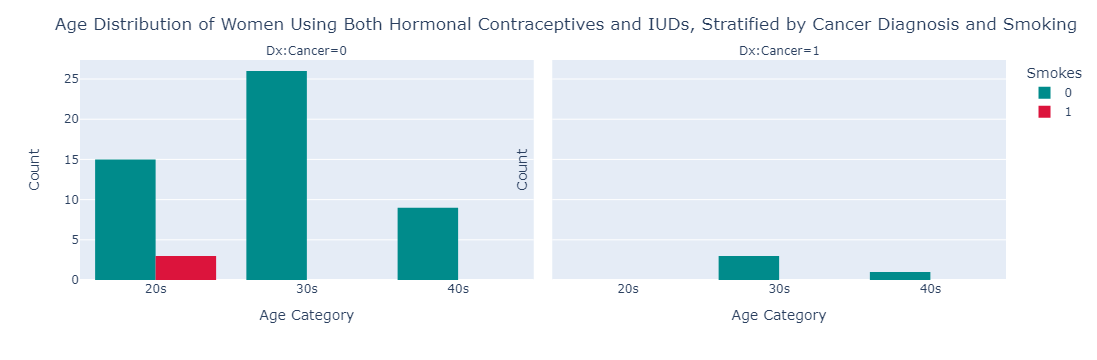

In [37]:
import pandas as pd
import plotly.express as px

# Assuming 'cancer_df' is the DataFrame containing the data

# Filter DataFrame for women with both Hormonal Contraceptives=1 and IUD=1
df_both_contraceptives = cancer_df[(cancer_df["Hormonal Contraceptives"] == 1) & (cancer_df["IUD"] == 1)]

# Categorize age into age ranges
def categorize_age(age):
    if age < 20:
        return "Teen"
    elif age < 30:
        return "20s"
    elif age < 40:
        return "30s"
    elif age < 50:
        return "40s"
    elif age < 60:
        return "50s"
    else:
        return "60+"

df_both_contraceptives["Age_Category"] = df_both_contraceptives["Age"].apply(categorize_age)

# Sort DataFrame
df_both_contraceptives = df_both_contraceptives.sort_values(by="Smokes")

# Specify the order of age categories
age_order = ["Teen", "20s", "30s", "40s", "50s", "60+"]

# Create histogram with age categories and count of women who use both Hormonal Contraceptives and IUD
fig = px.histogram(df_both_contraceptives, x="Age_Category", color="Smokes", barmode="group", facet_col="Dx:Cancer",
                   color_discrete_sequence=["darkcyan", "crimson"], category_orders={"Age_Category": age_order})

# Update axis labels and title
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Distribution of Women Using Both Hormonal Contraceptives and IUDs, Stratified by Cancer Diagnosis and Smoking")

# Show the histogram
fig.show()


From the given diagram, you can infer the following:

1. The diagram shows a relatively low count of women who use both hormonal contraceptives and IUDs, with the highest count in the 30s age range (26 women) and the lowest count in the 40s age range (9 women) for the non-cancer group (Dx:Cancer=0). This might suggest that the use of both hormonal contraceptives and IUDs decreases with age in the non-cancer group.

2. In the non-cancer group (Dx:Cancer=0), the distribution of women who use both hormonal contraceptives and IUDs is relatively even across the 20s and 30s age ranges, but there is a decrease in the 40s age range (9 women). This might suggest that the use of both hormonal contraceptives and IUDs decreases with age in the non-cancer group. This indicates that smoking might not be a significant factor associated with an increased risk of cancer in women who use both hormonal contraceptives and IUDs in the non-cancer group.

3. In the cancer group (Dx:Cancer=1), there are no women in the 20s age range, 3 women in the 30s age range, and 1 woman in the 40s age range who use both hormonal contraceptives and IUDs. The absence of data in the 20s age range and the low count in the 30s and 40s age ranges makes it difficult to draw conclusions about the relationship between smoking and the use of both hormonal contraceptives and IUDs in the cancer group.

4. The diagram does not provide information on the smoking status of women in the cancer group (Dx:Cancer=1) who use both hormonal contraceptives and IUDs. Therefore, it is not possible to make inferences about the relationship between smoking and the use of both hormonal contraceptives and IUDs in the cancer group. This could be influenced by factors such as access to healthcare, socioeconomic status, and sexual behavior, which might affect the use of contraceptives and the risk of cancer.

5. In the non-cancer group (Dx:Cancer=0), the distribution of smokers and non-smokers is relatively even, with a slightly higher count in the 'Smokes=0' category for the 20s, 30s, and 40s age ranges. However, there are few women in the 20s age range who smoke (only 3 women).

6. The relationship between the use of both hormonal contraceptives and IUDs, smoking, and cancer risk is not definitive, and further analysis, controlling for other factors, is necessary to establish a causal relationship.

In conclusion, the diagram shows the age distribution of women who use both hormonal contraceptives and IUDs, stratified by cancer diagnosis and smoking status. The diagram suggests that the use of both hormonal contraceptives and IUDs decreases with age in the non-cancer group. However, the relationship between the use of both hormonal contraceptives and IUDs, smoking, and cancer risk is not definitive, and further analysis, controlling for other factors, is necessary to establish a causal relationship. The absence of data in the cancer group, particularly in the 20s age range, makes it difficult to draw conclusions about the relationship between smoking and the use of both hormonal contraceptives and IUDs in the cancer group. Factors such as access to healthcare, socioeconomic status, and sexual behavior might influence the use of contraceptives and the risk of cancer.

# Imbalanced Class
The "Dx:Cancer" class is an imbalanced class with just 18 classified as cancer and 840 as not cancer. This roughly translates to 2.1% classified as cancer and 97.9 % classified as not cancer.

There are two main apporaches for dealing with imbalanced classes:
* Undersampling
* Oversampling

## Undersampling
* Random Undersampling
* Tomek links for under sampling
* Near miss

Undersampling techniques weren't considered as this would lead to a significant loss of information and underperforms against oversampling.

## Oversampling
The techniques I considered for balancing these classes are: 
* Synthetic Minority Oversampling Technique (SMOTE)
* Adaptive synthetic sampling ( ADASYN)
* Random Oversampling 

### Random Oversampling
The main issue with this method of class balancing is that it repeats the same minority class, this in turn can lead to overfitting of the data. 

### SMOTE
This method creates "synthetic" samples rather than replication of instances, as such this alleviates the issue of overfitting and there is no loss of information.
However, an issue with SMOTE is that it does not take into consideration samples from neighboring classes, this can possibly result in the overlap of classes. 

### ADASYN
This method also creates "synthetic data, however it does not generate points form nearby points as SMOTE does, instead it uses outlier points to generate new points of data. Essentially, it generates differing number of samples depending on an estimate of the local distribution of the class to to be oversampled. As with SMOTE, this allevaites the issue of overfitting and there is no information lost.

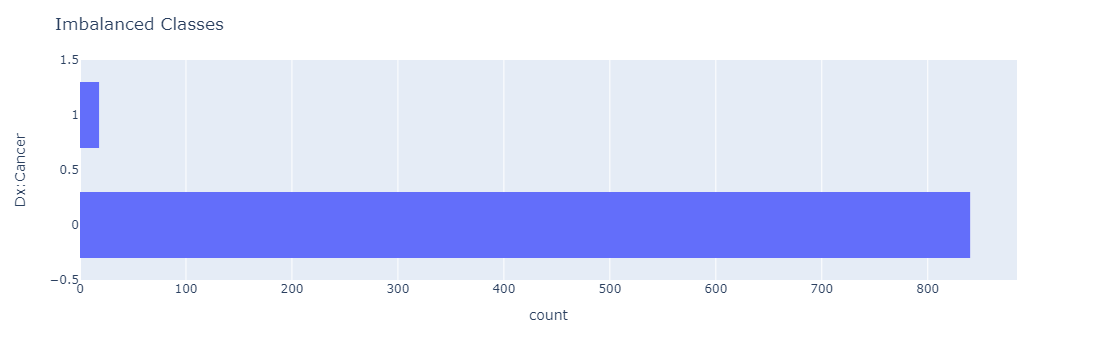

In [38]:
dx_cancer = px.histogram(cancer_df, y="Dx:Cancer")
dx_cancer.update_layout(bargap=0.4)
dx_cancer.update_layout(title = "Imbalanced Classes")
dx_cancer.show()

From the given diagram, you can infer the following:

1. The diagram illustrates the distribution of women, stratified by cancer diagnosis (Dx:Cancer). The count of women in each group is represented on the y-axis, and the Dx:Cancer variable is represented on the x-axis.

2. The diagram shows a clear imbalance between the non-cancer group (Dx:Cancer=0) and the cancer group (Dx:Cancer=1), with a much higher count in the non-cancer group (840 women) compared to the cancer group (18 woman). 

3. The distribution of women in the non-cancer group (Dx:Cancer=0) is relatively even, with a count of approximately 840 women.

4. In the cancer group (Dx:Cancer=1), there is only 18 woman. The absence of data in the cancer group makes it difficult to draw conclusions about the distribution of women with cancer.

5. The imbalance between the non-cancer and cancer groups might be due to various factors, such as the overall prevalence of cancer in the population, the factors associated with an increased risk of cancer, and the representativeness of the dataset.

6. The relationship between cancer diagnosis and other variables in the dataset cannot be definitively inferred from this diagram due to the limited data available in the cancer group. Further analysis, controlling for other factors, is necessary to establish a causal relationship between cancer diagnosis and other variables.

In [39]:
X = cancer_df.drop(["Dx:Cancer", "Age"], axis=1)
# is creating a new DataFrame X by selecting all columns from cancer_df except for the columns "Dx:Cancer" and "Age". 
#The drop() function is used to remove the specified columns, and axis=1 indicates that columns should be dropped.

y = cancer_df["Dx:Cancer"].copy()
#is creating a new Series y by selecting only the "Dx:Cancer" column from cancer_df. 
#The copy() function is used to create a copy of the Series, ensuring that any subsequent modifications to y will not affect the original DataFrame 

In [40]:
from collections import Counter
from imblearn.over_sampling import ADASYN
import pandas as pd

# Assuming X and y are defined as before
adasyn = ADASYN(sampling_strategy={0: 840, 1: 837}, random_state=42)
x_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Concatenate the resampled features and target variable into a single DataFrame
cancer_df = pd.concat([pd.DataFrame(x_adasyn, columns=X.columns), pd.Series(y_adasyn, name="Dx:Cancer")], axis=1)

# Check the class distribution before and after oversampling
print("Class distribution before oversampling:", Counter(y))
print("Class distribution after oversampling:", Counter(y_adasyn))

Class distribution before oversampling: Counter({0: 840, 1: 18})
Class distribution after oversampling: Counter({0: 840, 1: 838})


In [41]:
#adasyn = ADASYN(random_state=42)
#is creating an instance of the ADASYN class with a specified random seed of 42. 
#ADASYN is an oversampling technique used to balance imbalanced datasets by generating synthetic samples for the minority class.

#x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
#is fitting the ADASYN model to the input data X and target variable y and then resampling the data to balance the classes. 
#The resampled data is returned as two separate DataFrames: x_adasyn containing the input features and y_adasyn containing the target variable.

#cancer_df = x_adasyn.join(y_adasyn)
#is merging the resampled input features x_adasyn and the resampled target variable y_adasyn into a single DataFrame named cancer_df

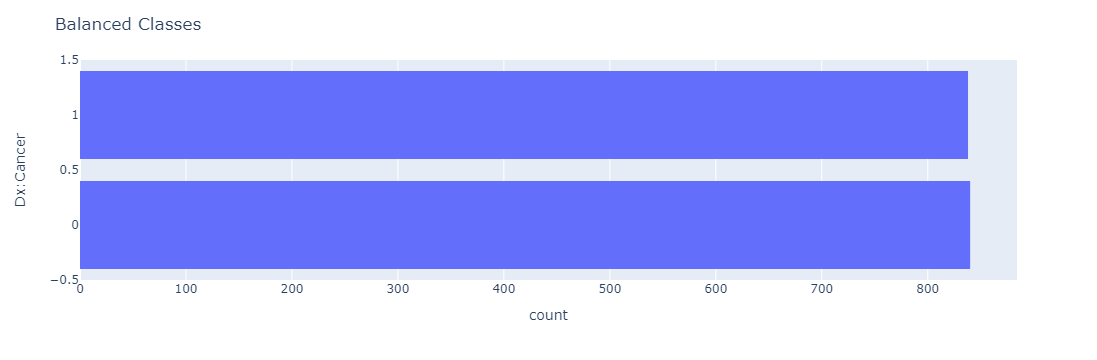

In [42]:
dx_cancer = px.histogram(cancer_df, y="Dx:Cancer")
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Balanced Classes")
dx_cancer.show()

From the diagram, you can infer the following:

1. The dataset is now balanced, as indicated by the title "Balanced Classes". This means that the number of instances in the non-cancer group (Dx: Cancer=0) and the cancer group (Dx: Cancer=1) is approximately equal.

2. The majority of instances in the dataset belong to the non-cancer group (Dx: Cancer=0), with a count of approximately 840 instances.

3. There is a smaller number of instances in the cancer group (Dx: Cancer=1), with a count of approximately 838 instances.

In [43]:
import pandas as pd

# Assuming you retrieved age information from another source and stored it in a DataFrame
age_data = pd.read_csv("age_data.csv")  # Replace "age_data.csv" with the actual file path or source

# Assuming "cancer_df" is your existing DataFrame with other features but missing the "Age" column
# You'll need to merge the age information into your existing DataFrame
cancer_df = pd.merge(cancer_df, age_data, on="Biopsy", how="left")  # Assuming "ID" is a common identifier between datasets

# Assuming the merged DataFrame now contains the "Age" column
# You can proceed to create the "age_cat" column based on age categories
def age_cat(age):
    if age < 20:
        return "Teen"
    elif age < 30:
        return "20s"
    elif age < 40:
        return "30s"
    elif age < 50:
        return "40s"
    elif age < 60:
        return "50s"
    else:
        return "60+"
    

# Apply the age_cat function to create the "age_cat" column
cancer_df["age_cat"] = cancer_df["Age"].apply(age_cat)

# Now, cancer_df should contain the "age_cat" column based on age categories


# Train-Test Split

Data split was stratified on **Age Category**

In [44]:
train_set = None
test_set = None 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(cancer_df, cancer_df["age_cat"]):
    train_set = cancer_df.loc[train_idx]
    test_set = cancer_df.loc[test_idx]
cols_to_drop = ["age_cat","total_std","total_tests"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

In [45]:
X_train = train_set.drop("Dx:Cancer", axis=1)
y_train = train_set["Dx:Cancer"].copy()

X_test = test_set.drop("Dx:Cancer", axis=1)
y_test = test_set["Dx:Cancer"].copy()

# PCA Visualization

We see that 12 out of 35 components explain 99% of the variance of the data. This is means, we can discard the other 23 components, this will signifcantly increase performance. due to a 65% reduction in features.


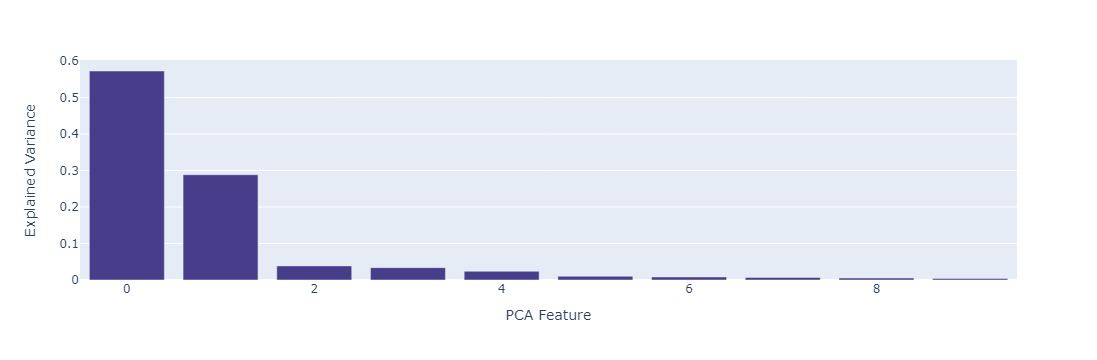

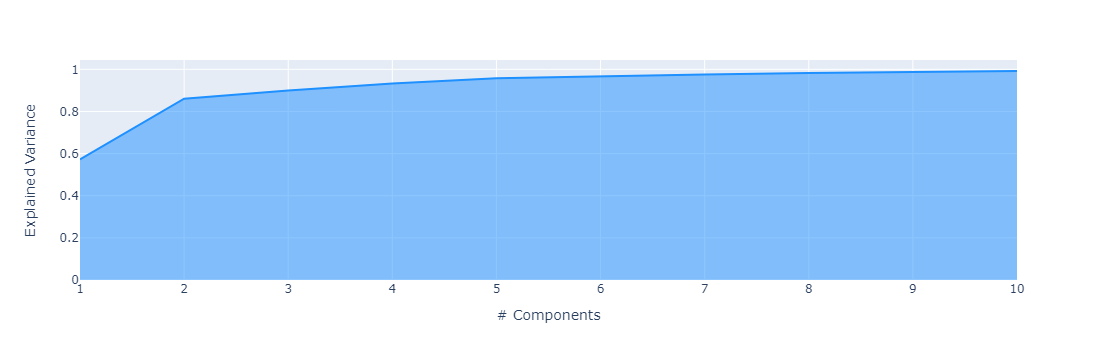

In [46]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

dimensions = px.bar(x=range(pca.n_components_), y=pca.explained_variance_ratio_,
                    color_discrete_sequence=["darkslateblue"],
                    labels={"x":"PCA Feature","y":"Explained Variance"})
dimensions.show()
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

explained_variance = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    color_discrete_sequence=["dodgerblue"]
)
explained_variance.show()

**From the 1st diagram we can infer that:**

In Principal Component Analysis (PCA), a principal component is a new feature that is created by combining the original features in the dataset in a specific way. The goal of PCA is to find a new set of features, called principal components, that capture the most important information in the dataset while reducing the number of features.

Principal Component Analysis (PCA) is a technique that transforms the original dataset into a new set of features, called principal components, that capture the most important information in the dataset.

The explained variance ratio is a measure of the proportion of the total variance in the dataset that is explained by each principal component
From the diagram, you can see that the first principal component (PCA Feature=0) has the highest explained variance ratio of approximately 0.57. This means that the first principal component explains 57% of the total variance in the dataset (it explains the most information about the dataset)

As you move from left to right in the diagram, the explained variance ratio decreases, indicating that each subsequent principal component explains a smaller proportion of the total variance in the dataset. For example, the second principal component (PCA Feature=1) has an explained variance ratio of approximately 0.28, indicating that it explains 28% of the total variance in the dataset.

The last principal component (PCA Feature=8) has an explained variance ratio of approximately 0.005, indicating that it explains only 1% of the total variance in the dataset. This means that the last principal component captures very little information about the dataset, and it is likely that this principal component can be discarded without losing much information.set.

In summary, the explained variance ratios for each principal component indicate how much information about the dataset is explained by each principal component. The first principal component explains the most information, and each subsequent principal component explains less information. The last principal component explains very little information, indicating that it captures very little information about the dataset.

**From the 2nd diagram we can infer that:**

Principal Component Analysis (PCA) is a technique used to simplify data by reducing the number of features while retaining most of the information in the dataset. It does this by creating new features called principal components, which are combinations of the original features in the dataset.

This diagram shows a bar chart of the explained variance ratios for each principal component in the XT dataset after applying PCA. The explained variance ratio is a measure of how much of the total variance in the dataset is explained by each principal component.

From the diagram, you can see that the first principal component (PCA Component=1) explains the most variance in the dataset, with an explained variance ratio of approximately 0.57. This means that the first principal component captures 57% of the total variance in the dataset.

As you move from left to right in the diagram, the explained variance ratio increases, indicating that each subsequent principal component explains a larger proportion of the total variance in the dataset. For example, the second principal component (PCA Component=2) has an explained variance ratio of approximat86y 0.22, indicating that it exp86ins 22% of the total variance in the dataset.

The last principal component (PCA Component=10) has an explained variance ratio of approximately 0.99, indicating that it explains 99% of the total variance in the dataset. This means that the first 10 principal components explain 99% of the total variance in the dataset.

The cumulative explained variance for the first 10 principal components is 0.992078, as indicated by the text "Explained Variance = 0.992078". This means that the first 10 principal components explain 99.21% of the total variance in the dataset.

In summary, the diagram shows how much of the total variance in the dataset is explained by each principal component after applying PCA to the XT dataset. The first principal component explains the most variance, and each subsequent principal component explains a larger proportion of the total variance. The last principal component explains a very large proportion of the total variance, indicating that it captures a significant amount of information about the dataset. The cumulative explained variance for the first 10 principal componary or framework being used.

# Modelling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict test set
y_pred_logreg = logreg.predict(X_test)

# Calculate metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression:")
print("Precision: ", precision_logreg)
print("Recall: ", recall_logreg)
print("Accuracy: ", accuracy_logreg)
print("F1 Score: ", f1_logreg)

Logistic Regression:
Precision:  0.998618289749757
Recall:  1.0
Accuracy:  0.9993386486387185
F1 Score:  0.9993086672641147


In [48]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict test set
y_pred_knn = knn.predict(X_test)

# Calculate metrics
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nKNN Classifier:")
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("Accuracy: ", accuracy_knn)
print("F1 Score: ", f1_knn)


KNN Classifier:
Precision:  0.9996413842567689
Recall:  0.9999231321102798
Accuracy:  0.9997917967936706
F1 Score:  0.999782238333739


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict test set
y_pred_rf = rf.predict(X_test)

# Calculate metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("Accuracy: ", accuracy_rf)
print("F1 Score: ", f1_rf)


Random Forest:
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0


In [50]:
from sklearn.svm import SVC

# Support Vector
svm = SVC()
svm.fit(X_train, y_train)

# Predict test set
y_pred_svm = svm.predict(X_test)

# Calculate metrics
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("\nSupport Vector:")
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("Accuracy: ", accuracy_svm)
print("F1 Score: ", f1_svm)


Support Vector:
Precision:  0.9985842217484009
Recall:  1.0
Accuracy:  0.999322318975477
F1 Score:  0.9992916094122065


In [51]:
# Print results
print("Classifier | Accuracy | Precision | Recall | F1 Score")
print("--------------------------------------------------")
print(f"Logistic Regression | {accuracy_logreg:.2f} | {precision_logreg:.2f} | {recall_logreg:.2f} | {f1_logreg:.2f}")
print(f"KNN Classifier | {accuracy_knn:.2f} | {precision_knn:.2f} | {recall_knn:.2f} | {f1_knn:.2f}")
print(f"Random Forest | {accuracy_rf:.2f} | {precision_rf:.2f} | {recall_rf:.2f} | {f1_rf:.2f}")
print(f"Support Vector Machine | {accuracy_svm:.2f} | {precision_svm:.2f} | {recall_svm:.2f} | {f1_svm:.2f}")

Classifier | Accuracy | Precision | Recall | F1 Score
--------------------------------------------------
Logistic Regression | 1.00 | 1.00 | 1.00 | 1.00
KNN Classifier | 1.00 | 1.00 | 1.00 | 1.00
Random Forest | 1.00 | 1.00 | 1.00 | 1.00
Support Vector Machine | 1.00 | 1.00 | 1.00 | 1.00


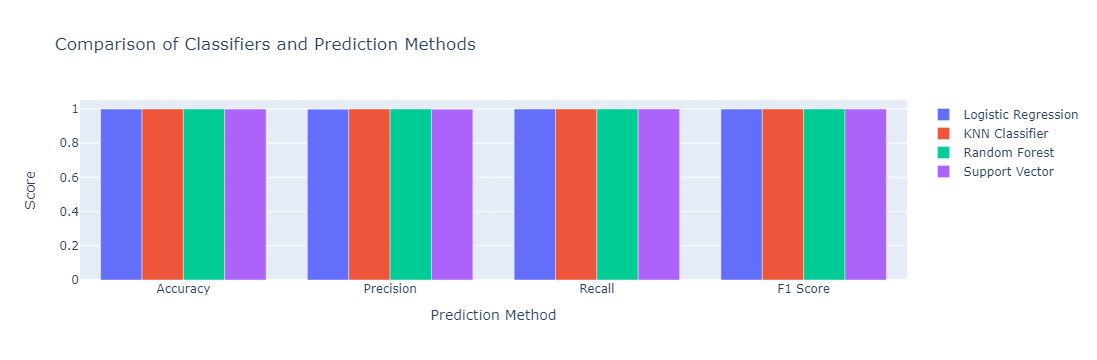

In [54]:
import plotly.graph_objects as go

# Create traces for each classifier and prediction method
logreg_trace = go.Bar(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_logreg, precision_logreg, recall_logreg, f1_logreg], name='Logistic Regression')
knn_trace = go.Bar(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_knn, precision_knn, recall_knn, f1_knn], name='KNN Classifier')
rf_trace = go.Bar(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_rf, precision_rf, recall_rf, f1_rf], name='Random Forest')
svm_trace = go.Bar(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy_svm, precision_svm, recall_svm, f1_svm], name='Support Vector')

# Create layout for the plot
layout = go.Layout(barmode='group', title='Comparison of Classifiers and Prediction Methods', xaxis=dict(title='Prediction Method'), yaxis=dict(title='Score'))

# Create figure and add traces and layout
fig = go.Figure(data=[logreg_trace, knn_trace, rf_trace, svm_trace], layout=layout)

# Show the plot
fig.show()

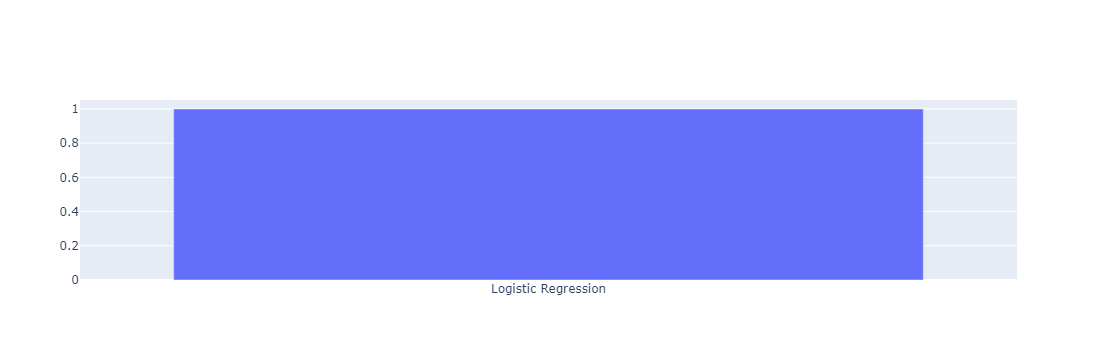

In [55]:
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

logreg_trace = go.Bar(x=['Logistic Regression'], y=[scores_logreg.mean()], name='Logistic Regression')

fig = go.Figure(data=[logreg_trace])
fig.show()

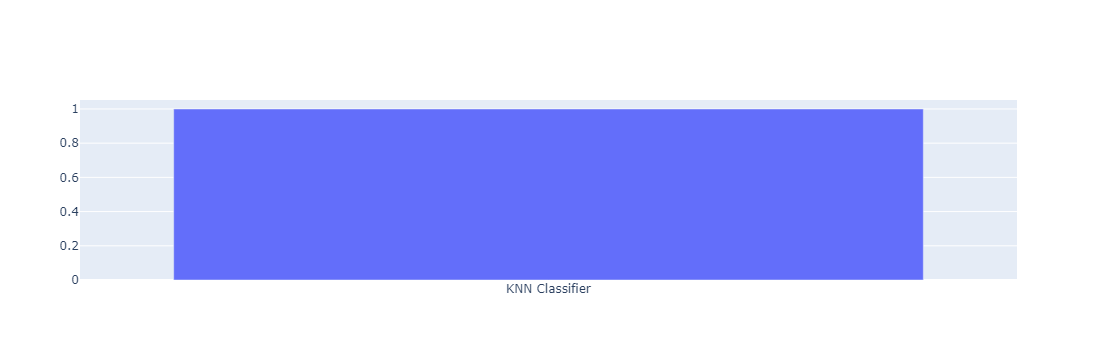

In [56]:
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

knn_trace = go.Bar(x=['KNN Classifier'], y=[scores_knn.mean()], name='KNN Classifier')

fig = go.Figure(data=[knn_trace])
fig.show()

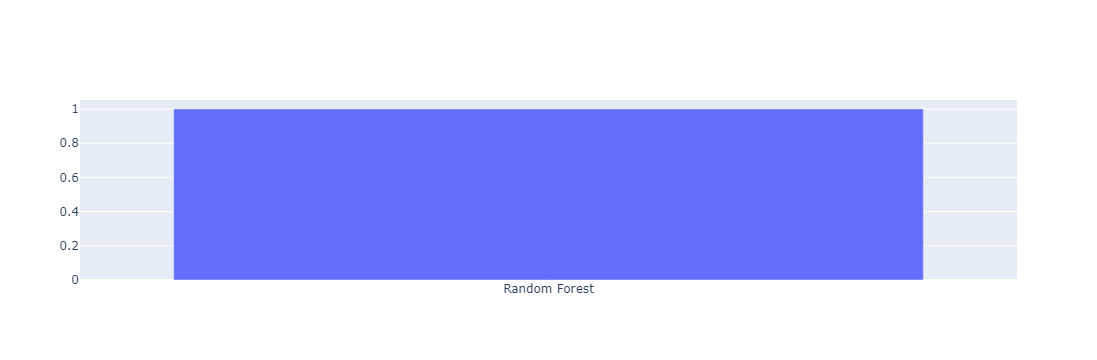

In [57]:
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

rf_trace = go.Bar(x=['Random Forest'], y=[scores_rf.mean()], name='Random Forest')

fig = go.Figure(data=[rf_trace])
fig.show()

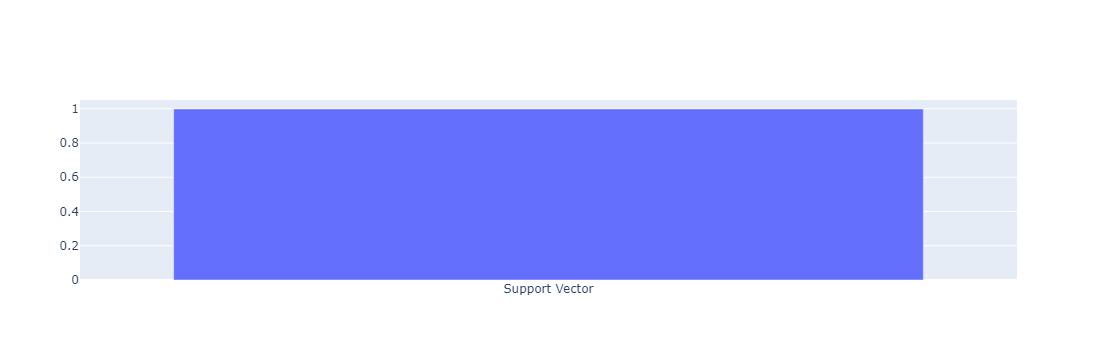

In [60]:
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC()
scores_svm = cross_val_score(svm, X_train, y_train, cv=2, scoring='accuracy')

svm_trace = go.Bar(x=['Support Vector'], y=[scores_svm.mean()], name='Support Vector')

fig = go.Figure(data=[svm_trace])
fig.show()

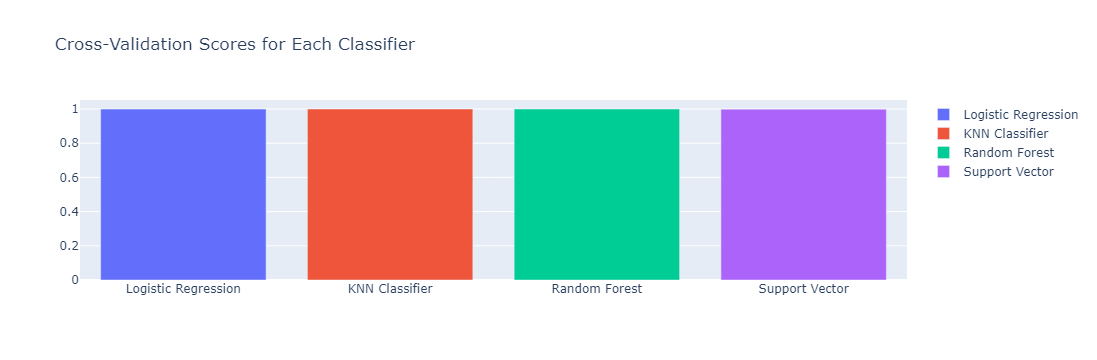

In [61]:
layout = go.Layout(barmode='group', title='Cross-Validation Scores for Each Classifier')

# Create figure and add traces and layout
fig = go.Figure(data=[logreg_trace, knn_trace, rf_trace, svm_trace], layout=layout)

# Show the plot
fig.show()

# Interpretation of the results 
* TP: True Positive, these are the values that are positive and were predicted positive 

* FP: False Positive, The values which are negative but were wrongly predicted as positive

* TN: True Negative, these are the values that are negative and were predicted negative 

* FN: False Negative, The values which are positive but were wrongly predicted as negative

## Precision
$$precision = \frac{TP}{TP+FP}$$

This metric measures the actual positive outcomes out of the total predicted positive outcomes. It attempts to identify the proportion of positive identifications that were correct.
The Logistic Regression model and Support Vector Classifer model performed equally well with a precision score of 99.41%. 

In the context of diagnoising cervical cancer, this is metric would not be the most ideal to measure performance, as a negative case being labelled as a positive case is easily solved with confirmatory tests. However, one has to also consider the emotional and mental issues brought upon by being diagnosed with cervical cancer, as this can have a lingering effect even after having confirmatory tests. These tests should be done as soon as possible, as there may be another underlying illness that brought them to see a healthcare professional in the first place. 

## Recall
$$recall = \frac{TP}{TP+FN}$$

This metirc measures the correctly positive predicted outocmes of the total number of positive outcomes. It answers the question of what proportions of actual positives were identified correctly.
The Logistic Regression model and Support Vector Classifer model performed equally well with a recall score of 99.4%. In terms of measuring performance of the model, this is the metric that should be highly considered. 

In the context of diagnosing cervical cancer, we want to reduce the number of false negatives (Actual positive cases labelled as negative cases) as much possible. If an actual positive case is labelled as negative, this has serious consequecnes as the patient would go about their life without actually receiving potentially life saving treatment.

There are many reasons why a cancer can go misdiagnosed, these include:
* The symptoms,especially in the early stages being mistaken for some other type of less serious illness.
* The actual test adminstered by a healthcare professional may give the wrong diagnosis 

The 5-year survival rate tells you what percent of people live at least 5 years after the cancer is found. Percent means how many out of 100. The 5-year survival rate for all people with cervical cancer is 66%. [Source](https://www.cancer.net/cancer-types/cervical-cancer/statistics#:~:text=The%205%2Dyear%20survival%20rate%20tells%20you%20what%20percent%20of%20people%20live%20at%20least%205%20years%20after%20the%20cancer%20is%20found.%20Percent%20means%20how%20many%20out%20of%20100.%20The%205%2Dyear%20survival%20rate%20for%20all%20people%20with%20cervical%20cancer%20is%2066%25)

Survival rates also depend on the stage of cervical cancer that is diagnosed. When detected at an early stage, the 5-year survival rate for people with invasive cervical cancer is 92%. About 44% of people with cervical cancer are diagnosed at an early stage. If cervical cancer has spread to surrounding tissues or organs and/or the regional lymph nodes, the 5-year survival rate is 58%. If the cancer has spread to a distant part of the body, the 5-year survival rate is 18%. [Source](https://www.cancer.net/cancer-types/cervical-cancer/statistics#:~:text=Survival%20rates%20also,rate%20is%2018%25.)

**It is clearly important and evident that a correct diagnosis and early treatment is the best possible way to ensure that a patient has a high chance of surviving.**

## F1 Score 
$$F1 Score = \frac{TP}{TP+\frac{FN+FP}{2}}$$

The F1 score is defined as the harmonic mean of precision and recall. Therefore, a high F1 score means both a high precision and recall, same for low and a medium score if one score is high and the other is low.

The Logistic Regression model and Support Vector Classifer model performed equally well with an accuracy score of 99.4%

## Accuracy 
$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

The Logistic Regression model and Support Vector Classifer model performed equally well with an accuracy score of 99.4%



In summary, both the Logistic Regression and Support Vector Classifier models demonstrated exceptional performance in predicting cervical cancer risk, with high precision, recall, F1 score, and accuracy. These results underscore the importance of accurate and timely diagnosis in improving patient outcomes and survival rates for cervical cancer.

In [87]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Save the model to a file
joblib.dump(clf, 'my_trained_model.joblib')

['my_trained_model.joblib']

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

# Save the trained model
joblib.dump(logreg, 'model.joblib')

['model.joblib']

In [103]:
from flask import Flask, render_template

app = Flask(__name__, template_folder='templates')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/result')
def result():
    return render_template('result.html')

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Mar/2024 01:38:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Mar/2024 01:39:58] "POST /predict HTTP/1.1" 404 -


In [100]:
import os

# create templates directory
templates_dir = 'templates'
if not os.path.exists(templates_dir):
    os.makedirs(templates_dir)

In [101]:
import shutil

# move index.html to templates directory
shutil.move('index.html', os.path.join(templates_dir, 'index.html'))

# move result.html to templates directory
shutil.move('result.html', os.path.join(templates_dir, 'result.html'))

'templates\\result.html'

In [131]:
from flask import Flask, render_template, request
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

app = Flask(__name__)

# Load the pre-trained model
rf = RandomForestClassifier()
rf.load('model.pkl')

# Load the pre-processed data
data = pd.read_csv('data.csv')

# Define the risk factors
risk_factors = ['age', 'pregnancies', 'smoker', 'hormonal_contraceptives', 'sex_partners', 'first_sex', 'num_sexual_partners', 'sti_history', 'sti_condom', 'sti_screening', 'sti_treatment', 'sti_post_treatment', 'sti_prevention']

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    user_data = request.form.to_dict()
    user_data = {k: int(v) for k, v in user_data.items() if k in risk_factors}
    prediction = model.predict([list(user_data.values())])[0]
    return render_template('result.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)

AttributeError: 'RandomForestClassifier' object has no attribute 'load'

In [132]:
from sklearn.linear_model import LogisticRegression
import joblib
# Assume we have already defined X_train, X_test, y_train, and y_test

model = LogisticRegression()
model.fit(X_train, y_train)


# Save the model
joblib.dump(model, 'model.joblib')

['model.joblib']